Import libraries

In [ ]:
import os
import matplotlib.pyplot as plt
import random
import pandas as pd
import cv2
from numpy import asarray
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, Input, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from skimage.io import imread

Import Dataset

Iterating through subfolders within a specified directory, extracting image files with extensions ".png" or ".jpg" and categorizing them into separate lists based on the subfolder they belong to, printing each file path as it is processed.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_path = '/content/drive/MyDrive/Colab Notebooks (1)/Driver_Behavoiur_Detection_Dataset/Revitsone-5classes'

other_activities_images = []
safe_driving_images = []
talking_phone_images = []
texting_phone_images = []
turning_images = []

class_folders = ['other_activities', 'safe_driving', 'talking_phone', 'texting_phone', 'turning']

for folder in class_folders:
    class_folder_path = os.path.join(dataset_path, folder)
    for file in os.listdir(class_folder_path):
        file_path = os.path.join(class_folder_path, file)
        if file.endswith(".png") or file.endswith(".jpg"):
            if folder == 'other_activities':
                other_activities_images.append(file_path)
            elif folder == 'safe_driving':
                safe_driving_images.append(file_path)
            elif folder == 'talking_phone':
                talking_phone_images.append(file_path)
            elif folder == 'texting_phone':
                texting_phone_images.append(file_path)
            elif folder == 'turning':
                turning_images.append(file_path)
            print(file_path)


Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/Colab Notebooks (1)/Driver_Behavoiur_Detection_Dataset/Revitsone-5classes/talking_phone/img_22831.jpg
/content/drive/MyDrive/Colab Notebooks (1)/Driver_Behavoiur_Detection_Dataset/Revitsone-5classes/talking_phone/img_22879.jpg
/content/drive/MyDrive/Colab Notebooks (1)/Driver_Behavoiur_Detection_Dataset/Revitsone-5classes/talking_phone/img_2215.jpg
/content/drive/MyDrive/Colab Notebooks (1)/Driver_Behavoiur_Detection_Dataset/Revitsone-5classes/talking_phone/img_22904.jpg
/content/drive/MyDrive/Colab Notebooks (1)/Driver_Behavoiur_Detection_Dataset/Revitsone-5classes/talking_phone/img_23015.jpg
/content/drive/MyDrive/Colab Notebooks (1)/Driver_Behavoiur_Detection_Dataset/Revitsone-5classes/talking_phone/img_22096.jpg
/content/drive/MyDrive/Colab Notebooks (1)/Driver_Behavoiur_Detection_Dataset/Revitsone-5classes/talking_phone/img_22200.jpg
/content/drive/MyDrive/Colab Notebooks (1)/Driver_Behavoiur_Detection_Datas

Pre Modeling

In [ ]:
def find_unreadable_images_path(folder_path):
    '''
    This Python function, find_unreadable_images_path, scans a specified folder for image files, attempting to open each one and appending the paths of any unreadable images to a list.
    '''
    unreadable_images_path = []

    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)

        try:
            with Image.open(file_path) as img:
                pass
        except Exception as e:
            unreadable_images_path.append(file_path)

    return unreadable_images_path


In [ ]:
folder_path_other = '/content/drive/MyDrive/Colab Notebooks (1)/Driver_Behavoiur_Detection_Dataset/Revitsone-5classes/other_activities'
paths_to_remove_other = find_unreadable_images_path(folder_path_other)
folder_path_turn = '/content/drive/MyDrive/Colab Notebooks (1)/Driver_Behavoiur_Detection_Dataset/Revitsone-5classes/turning'
paths_to_remove_turn = find_unreadable_images_path(folder_path_turn)

**Delete unreadable images**

In [ ]:
# Assuming the paths_to_remove_other and paths_to_remove_turn are lists containing paths to be removed
for path_to_remove in paths_to_remove_other:
    if path_to_remove in other_activities_images:
        other_activities_images.remove(path_to_remove)

for path_to_remove in paths_to_remove_turn:
    if path_to_remove in turning_images:
        turning_images.remove(path_to_remove)


Plot random images from each class

This part is for better understanding the images that we have.

<ipython-input-8-6f5bdf0a0db3>:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i + 1)


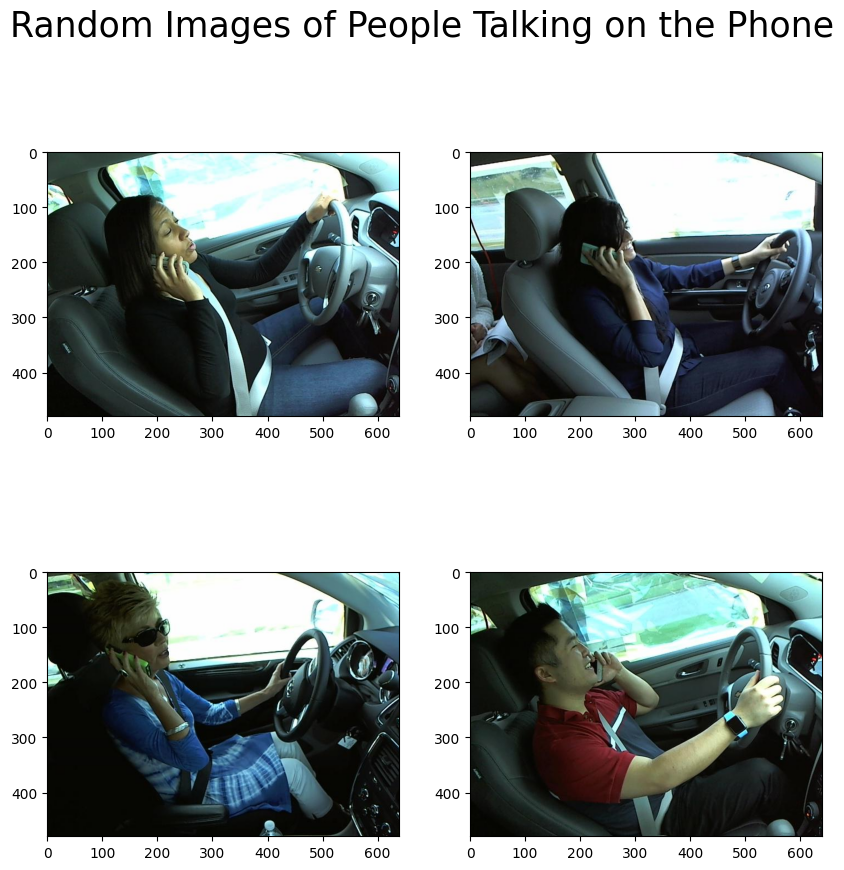

In [ ]:
plt.figure(1, figsize=(10, 10), facecolor='white')
plt.axis('off')

plt.suptitle("Random Images of People Talking on the Phone",
             fontsize=25)

for i in range(4):
    random_img = random.choice(talking_phone_images)
    imgs = imread(random_img)
    plt.subplot(2, 2, i + 1)
    plt.imshow(imgs)

plt.show()

<ipython-input-9-e0a8fbb7d2bd>:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i + 1)


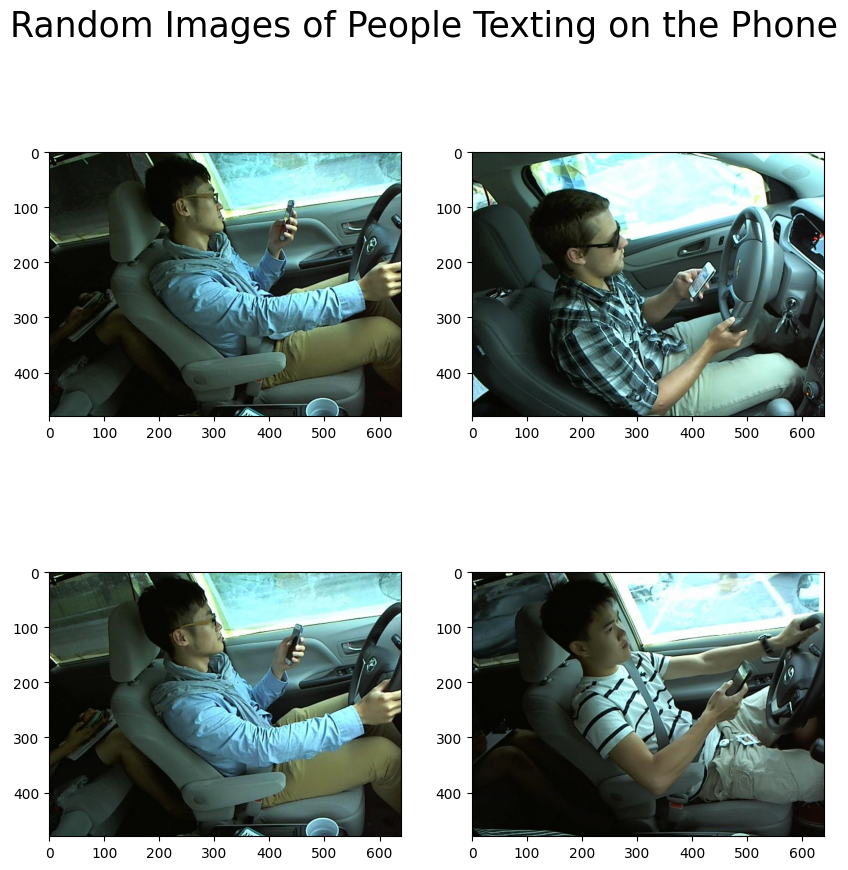

In [ ]:
plt.figure(1, figsize=(10, 10), facecolor='white')
plt.axis('off')

plt.suptitle("Random Images of People Texting on the Phone",
             fontsize=25)

for i in range(4):
    random_img = random.choice(texting_phone_images)
    imgs = imread(random_img)
    plt.subplot(2, 2, i + 1)
    plt.imshow(imgs)

plt.show()

<ipython-input-10-27fdb88a378f>:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i + 1)


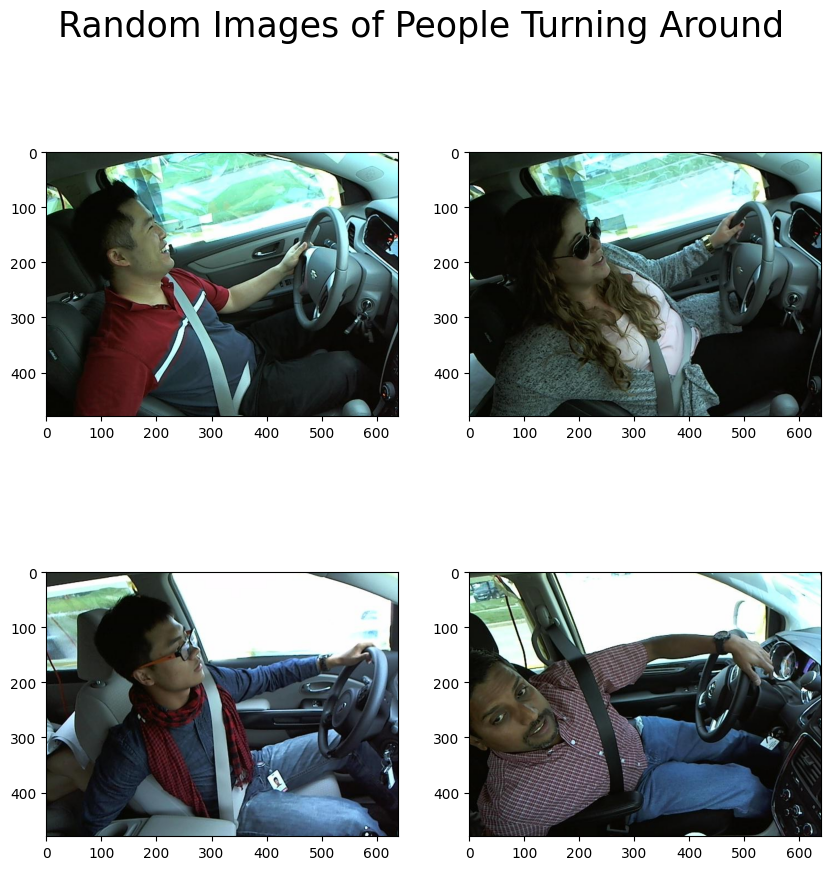

In [ ]:
plt.figure(1, figsize=(10, 10), facecolor='white')
plt.axis('off')

plt.suptitle("Random Images of People Turning Around",
             fontsize=25)

for i in range(4):
    random_img = random.choice(turning_images)
    imgs = imread(random_img)
    plt.subplot(2, 2, i + 1)
    plt.imshow(imgs)

plt.show()

<ipython-input-11-77bfb07a8cf0>:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i + 1)


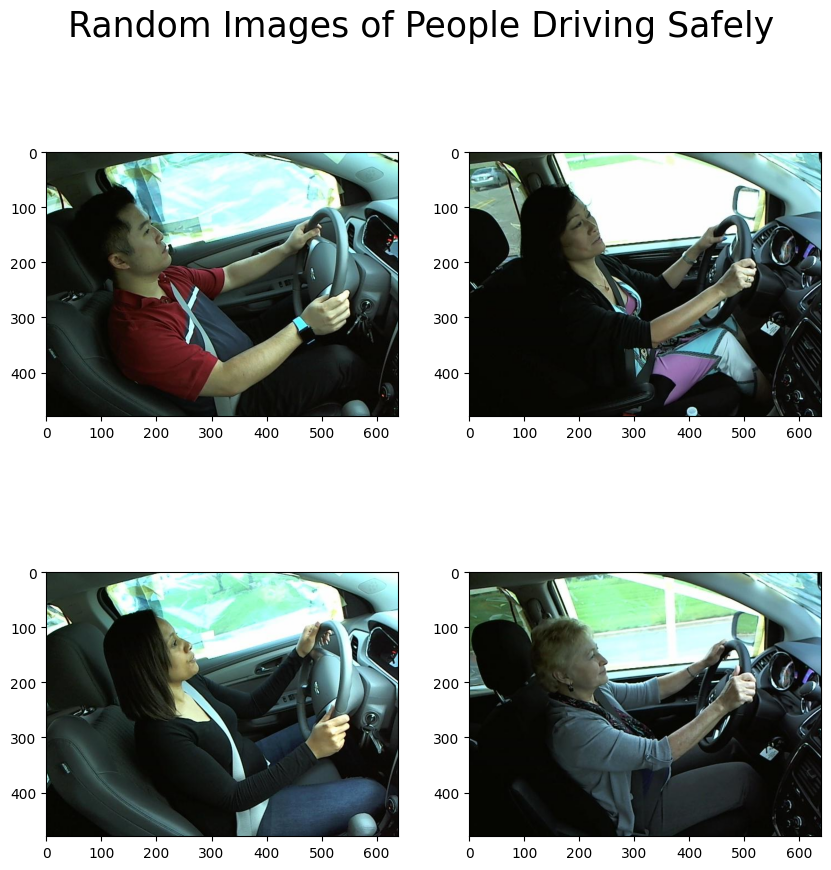

In [ ]:
plt.figure(1, figsize=(10, 10), facecolor='white')
plt.axis('off')

plt.suptitle("Random Images of People Driving Safely",
             fontsize=25)

for i in range(4):
    random_img = random.choice(safe_driving_images)
    imgs = imread(random_img)
    plt.subplot(2, 2, i + 1)
    plt.imshow(imgs)

plt.show()

<ipython-input-12-628439e1bcf6>:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i + 1)


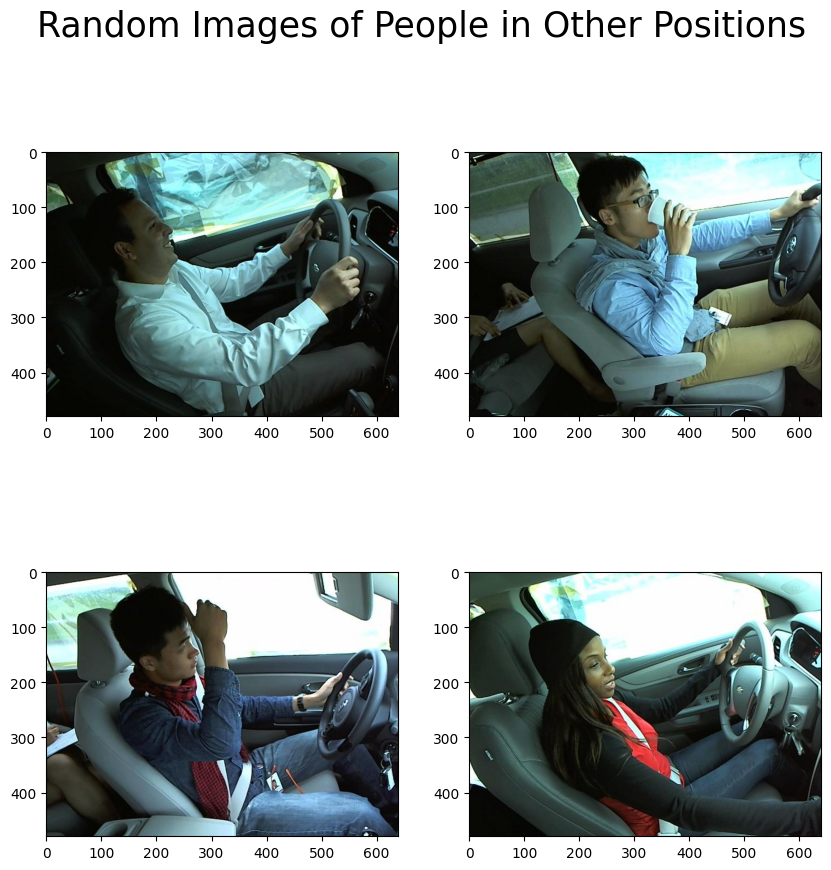

In [ ]:
plt.figure(1, figsize=(10, 10), facecolor='white')
plt.axis('off')

plt.suptitle("Random Images of People in Other Positions",
             fontsize=25)

for i in range(4):
    random_img = random.choice(other_activities_images)
    imgs = imread(random_img)
    plt.subplot(2, 2, i + 1)
    plt.imshow(imgs)

plt.show()

Split data to train, test, validation

Dividing the dataset in to: 1- train = 75%, 2- test = 15% and 3- valid = 10%

In [ ]:
num_other = len(other_activities_images)
num_safe = len(safe_driving_images)
num_talking = len(talking_phone_images)
num_text = len(texting_phone_images)
num_turn = len(turning_images)

print(f"Number of samples in Class 'Other': {num_other}")
print(f"Number of samples in Class 'Safe Driving': {num_safe}")
print(f"Number of samples in Class 'Talking Phone': {num_talking}")
print(f"Number of samples in Class 'Texting Phone': {num_text}")
print(f"Number of samples in Class 'Turning': {num_turn}")

Number of samples in Class 'Other': 2119
Number of samples in Class 'Safe Driving': 2203
Number of samples in Class 'Talking Phone': 2169
Number of samples in Class 'Texting Phone': 2203
Number of samples in Class 'Turning': 2057


In [ ]:
split_ratio = {
    'Other': (.75 * num_other, .15 * num_other, .1 * num_other),
    'Safe Driving': (.75 * num_safe, .15 * num_safe, .1 * num_safe),
    'Talking Phone': (.75 * num_talking, .15 * num_talking, .1 * num_talking),
    'Texting Phone': (.75 * num_text, .15 * num_text, .1 * num_text),
    'Turning': (.75 * num_turn, .15 * num_turn, .1 * num_turn)
}

for class_name, (train_count, val_count, test_count) in split_ratio.items():
    print(f"For class '{class_name}':")
    print(f"Number of samples for training: {train_count}")
    print(f"Number of samples for validation: {val_count}")
    print(f"Number of samples for testing: {test_count}\n")

For class 'Other':
Number of samples for training: 1589.25
Number of samples for validation: 317.84999999999997
Number of samples for testing: 211.9

For class 'Safe Driving':
Number of samples for training: 1652.25
Number of samples for validation: 330.45
Number of samples for testing: 220.3

For class 'Talking Phone':
Number of samples for training: 1626.75
Number of samples for validation: 325.34999999999997
Number of samples for testing: 216.9

For class 'Texting Phone':
Number of samples for training: 1652.25
Number of samples for validation: 330.45
Number of samples for testing: 220.3

For class 'Turning':
Number of samples for training: 1542.75
Number of samples for validation: 308.55
Number of samples for testing: 205.70000000000002



In [ ]:
# For class 'Other'
train_other = other_activities_images[:1596]
test_other = other_activities_images[1596:1916]
valid_other = other_activities_images[1916:]

print("For class 'Other':")
print("Train:", len(train_other))
print("Test:", len(test_other))
print("Valid:", len(valid_other))

# For class 'Safe Driving'
train_safe = safe_driving_images[:1652]
test_safe = safe_driving_images[1652:1982]
valid_safe = safe_driving_images[1982:]

print("\nFor class 'Safe Driving':")
print("Train:", len(train_safe))
print("Test:", len(test_safe))
print("Valid:", len(valid_safe))

# For class 'Talking Phone'
train_talking = talking_phone_images[:1627]
test_talking = talking_phone_images[1627:1952]
valid_talking = talking_phone_images[1952:]

print("\nFor class 'Talking Phone':")
print("Train:", len(train_talking))
print("Test:", len(test_talking))
print("Valid:", len(valid_talking))

# For class 'Texting Phone'
train_text = texting_phone_images[:1652]
test_text = texting_phone_images[1652:1982]
valid_text = texting_phone_images[1982:]

print("\nFor class 'Texting Phone':")
print("Train:", len(train_text))
print("Test:", len(test_text))
print("Valid:", len(valid_text))

# For class 'Turning'
train_turn = turning_images[:1543]
test_turn = turning_images[1543:1848]
valid_turn = turning_images[1848:]

print("\nFor class 'Turning':")
print("Train:", len(train_turn))
print("Test:", len(test_turn))
print("Valid:", len(valid_turn))

For class 'Other':
Train: 1596
Test: 320
Valid: 203

For class 'Safe Driving':
Train: 1652
Test: 330
Valid: 221

For class 'Talking Phone':
Train: 1627
Test: 325
Valid: 217

For class 'Texting Phone':
Train: 1652
Test: 330
Valid: 221

For class 'Turning':
Train: 1543
Test: 305
Valid: 209


**Create dataframes for train, test, prediction**

In [ ]:
train_other_df = pd.DataFrame({'image': train_other, 'label': 'Other'})
train_safe_df = pd.DataFrame({'image': train_safe, 'label': 'Safe Driving'})
train_talking_df = pd.DataFrame({'image': train_talking, 'label': 'Talking Phone'})
train_text_df = pd.DataFrame({'image': train_text, 'label': 'Texting Phone'})
train_turn_df = pd.DataFrame({'image': train_turn, 'label': 'Turning'})


In [ ]:
test_other_df = pd.DataFrame({'image': test_other, 'label': 'Other'})
test_safe_df = pd.DataFrame({'image': test_safe, 'label': 'Safe Driving'})
test_talking_df = pd.DataFrame({'image': test_talking, 'label': 'Talking Phone'})
test_text_df = pd.DataFrame({'image': test_text, 'label': 'Texting Phone'})
test_turn_df = pd.DataFrame({'image': test_turn, 'label': 'Turning'})

In [ ]:
valid_other_df = pd.DataFrame({'image': valid_other, 'label': 'Other'})
valid_safe_df = pd.DataFrame({'image': valid_safe, 'label': 'Safe Driving'})
valid_talking_df = pd.DataFrame({'image': valid_talking, 'label': 'Talking Phone'})
valid_text_df = pd.DataFrame({'image': valid_text, 'label': 'Texting Phone'})
valid_turn_df = pd.DataFrame({'image': valid_turn, 'label': 'Turning'})

In [ ]:
train_df = pd.concat([train_other_df, train_safe_df, train_talking_df, train_text_df, train_turn_df], ignore_index=True)
test_df = pd.concat([test_other_df, test_safe_df, test_talking_df, test_text_df, test_turn_df], ignore_index=True)
val_df = pd.concat([valid_other_df, valid_safe_df, valid_talking_df, valid_text_df, valid_turn_df], ignore_index=True)

In [ ]:
train_df.head()

image  label
0  /content/drive/MyDrive/Colab Notebooks (1)/Dri...  Other
1  /content/drive/MyDrive/Colab Notebooks (1)/Dri...  Other
2  /content/drive/MyDrive/Colab Notebooks (1)/Dri...  Other
3  /content/drive/MyDrive/Colab Notebooks (1)/Dri...  Other
4  /content/drive/MyDrive/Colab Notebooks (1)/Dri...  Other

In [ ]:
print("Number of samples in the training dataframe:", len(train_df))
print("Number of samples in the testing dataframe:", len(test_df))
print("Number of samples in the validation dataframe:", len(val_df))

Number of samples in the training dataframe: 8070
Number of samples in the testing dataframe: 1610
Number of samples in the validation dataframe: 1071


**Calculate the ratio of images**

In [ ]:
random_height = random.choice(train_other)

In [ ]:
Image= cv2.imread(random_height)

h, w= Image.shape[:2]

print("The height is ", h)

print("The width is ", w)

The height is  480
The width is  640


**Define** **hyperparameters**

In [ ]:
Batch_size = 64
Img_height = 240
Img_width = 240

**Rescale the images**

In [ ]:
trainGenerator = ImageDataGenerator(rescale=1./255.)
valGenerator = ImageDataGenerator(rescale=1./255.)
testGenerator = ImageDataGenerator(rescale=1./255.)

 **Input Model**

Setting up data generators to preprocess and load image data from dataframes for training, testing, and validation, using Keras's ImageDataGenerator

In [ ]:
trainDataset = trainGenerator.flow_from_dataframe(
  dataframe=train_df,
  class_mode="categorical",
  x_col="image",
  y_col="label",
  batch_size=Batch_size,
  seed=42,
  shuffle=True,
  target_size=(Img_height,Img_width) #set the height and width of the images
)

testDataset = testGenerator.flow_from_dataframe(
  dataframe=test_df,
  class_mode='categorical',
  x_col="image",
  y_col="label",
  batch_size=Batch_size,
  seed=42,
  shuffle=True,
  target_size=(Img_height,Img_width)
)

valDataset = valGenerator.flow_from_dataframe(
  dataframe=val_df,
  class_mode='categorical',
  x_col="image",
  y_col="label",
  batch_size=Batch_size,
  seed=42,
  shuffle=True,
  target_size=(Img_height,Img_width)
)

Found 8070 validated image filenames belonging to 5 classes.
Found 1610 validated image filenames belonging to 5 classes.
Found 1071 validated image filenames belonging to 5 classes.


**VGGNet**:VGGNet, introduced in 2014 by the Visual Geometry Group at the University of Oxford, is a deep convolutional neural network architecture renowned for its simplicity and effectiveness. VGGNet is characterized by its deep structure consisting of multiple convolutional layers, with small 3x3 filters, followed by max-pooling layers for spatial downsampling. The key innovation of VGGNet lies in its uniform architecture design, where the network depth is increased by stacking convolutional layers, resulting in configurations such as VGG16 and VGG19 with 16 and 19 layers, respectively. This straightforward design, with relatively small filter sizes and no complicated modules, enables VGGNet to learn complex hierarchical features effectively, making it widely used as a backbone for various computer vision tasks, including image classification, object detection, and segmentation. Despite its simplicity, VGGNet achieved competitive performance in the ImageNet Large Scale Visual Recognition Challenge, showcasing the effectiveness of deep convolutional neural networks for visual recognition tasks.

**Model**

In [ ]:
def VGGNet():
    inp = layers.Input((240, 240, 3))
    x = layers.Conv2D(64, 3, 1, activation='relu')(inp)
    x = layers.Conv2D(64, 3, 1, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(2, 2)(x)
    x = layers.Conv2D(128, 3, 1, activation='relu')(x)
    x = layers.Conv2D(128, 3, 1, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(2, 2)(x)
    x = layers.Conv2D(256, 3, 1, activation='relu')(x)
    x = layers.Conv2D(256, 3, 1, activation='relu')(x)
    x = layers.Conv2D(256, 3, 1, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(2, 2)(x)
    x = layers.Conv2D(512, 3, 1, activation='relu')(x)
    x = layers.Conv2D(512, 3, 1, activation='relu')(x)
    x = layers.Conv2D(512, 3, 1, activation='relu')(x)
    x = layers.MaxPooling2D(2, 2)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(5, activation='softmax')(x)

    model_VGG = models.Model(inputs=inp, outputs=x)

    return model_VGG

model_VGG = VGGNet()
model_VGG.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 240, 240, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 238, 238, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 236, 236, 64)      36928     
                                                                 
 batch_normalization (Batch  (None, 236, 236, 64)      256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 118, 118, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 116, 116, 128)     73856 

Generating a visual representation of the VGG model architecture, including layer shapes and names, and saving it as an image file.

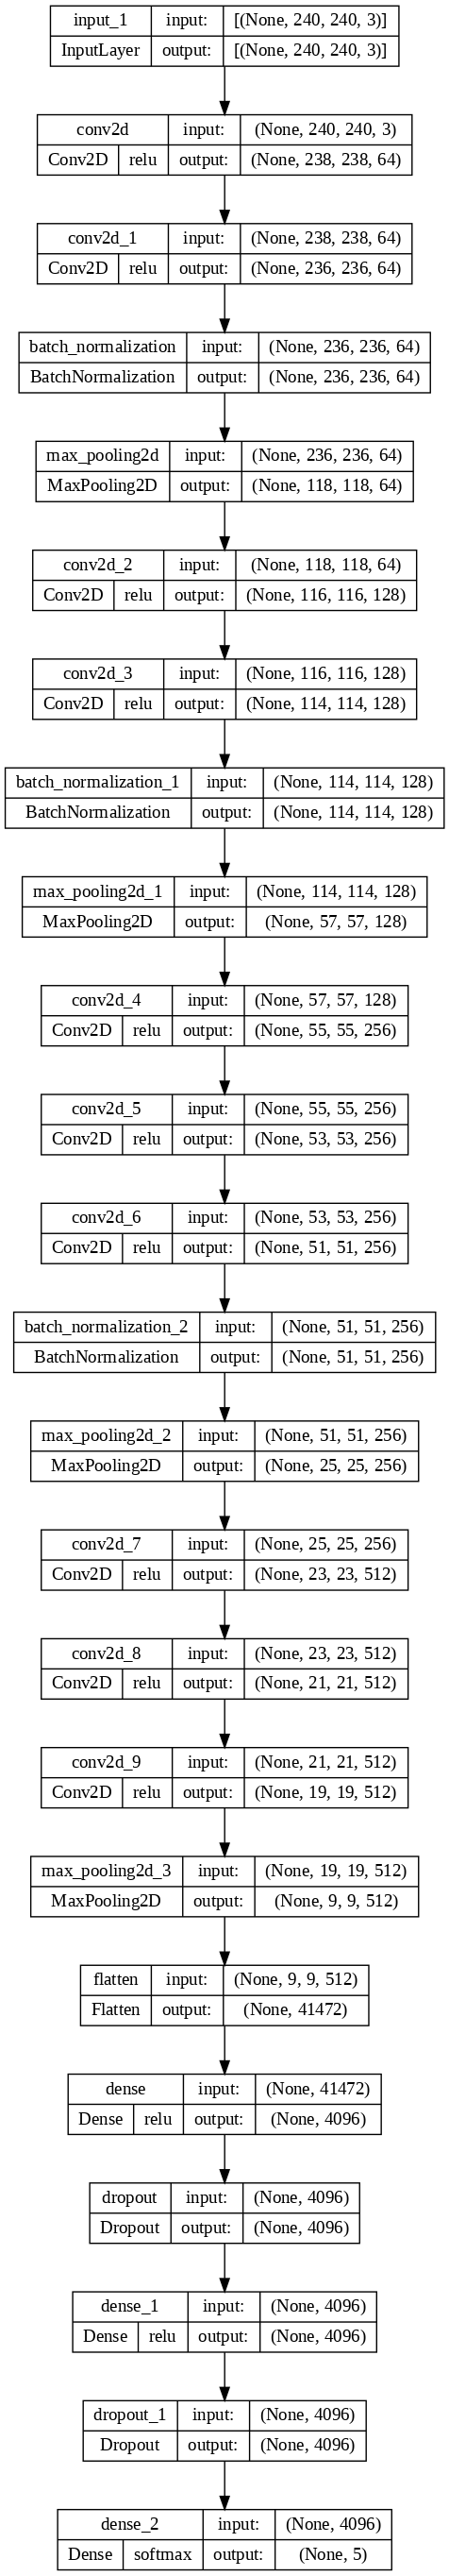

In [ ]:
tf.keras.utils.plot_model(
    model_VGG,
    to_file='vgg_model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    show_layer_activations=True,
    dpi=100
)

In [ ]:
model_VGG.compile(loss=BinaryCrossentropy(),
              optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
VGG_model = model_VGG.fit(trainDataset, epochs=20, validation_data=valDataset)

Epoch 1/20
127/127 [==============================] - 1456s 11s/step - loss: 1.4623 - accuracy: 0.5053 - val_loss: 0.5574 - val_accuracy: 0.2979
Epoch 2/20
127/127 [==============================] - 117s 921ms/step - loss: 0.1435 - accuracy: 0.8690 - val_loss: 0.6061 - val_accuracy: 0.3221
Epoch 3/20
127/127 [==============================] - 118s 923ms/step - loss: 0.0715 - accuracy: 0.9382 - val_loss: 0.6386 - val_accuracy: 0.4874
Epoch 4/20
127/127 [==============================] - 118s 929ms/step - loss: 0.0523 - accuracy: 0.9566 - val_loss: 0.3859 - val_accuracy: 0.8627
Epoch 5/20
127/127 [==============================] - 117s 917ms/step - loss: 0.0416 - accuracy: 0.9695 - val_loss: 0.2524 - val_accuracy: 0.8515
Epoch 6/20
127/127 [==============================] - 117s 920ms/step - loss: 0.0241 - accuracy: 0.9815 - val_loss: 0.2803 - val_accuracy: 0.8525
Epoch 7/20
127/127 [==============================] - 117s 919ms/step - loss: 0.0406 - accuracy: 0.9686 - val_loss: 0.4451 - 

In [ ]:
# Saving the model architecture to JSON file
model_json = model_VGG.to_json()
with open("vgg_model.json", "w") as json_file:
    json_file.write(model_json)

# Saving the weights to HDF5 file
model_VGG.save_weights("vgg_model_weights.h5")

**Output**

In [ ]:
train_loss_vgg = VGG_model.history['loss']
val_loss_vgg = VGG_model.history['val_loss']
train_acc_vgg = VGG_model.history['accuracy']
val_acc_vgg = VGG_model.history['val_accuracy']
epoch_count = range(1, len(train_loss_vgg) + 1)

<ipython-input-33-247b289f08b1>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epoch_count, val_loss_vgg, '--bo', color='orangered', linewidth=2.5, label='Validation Loss')


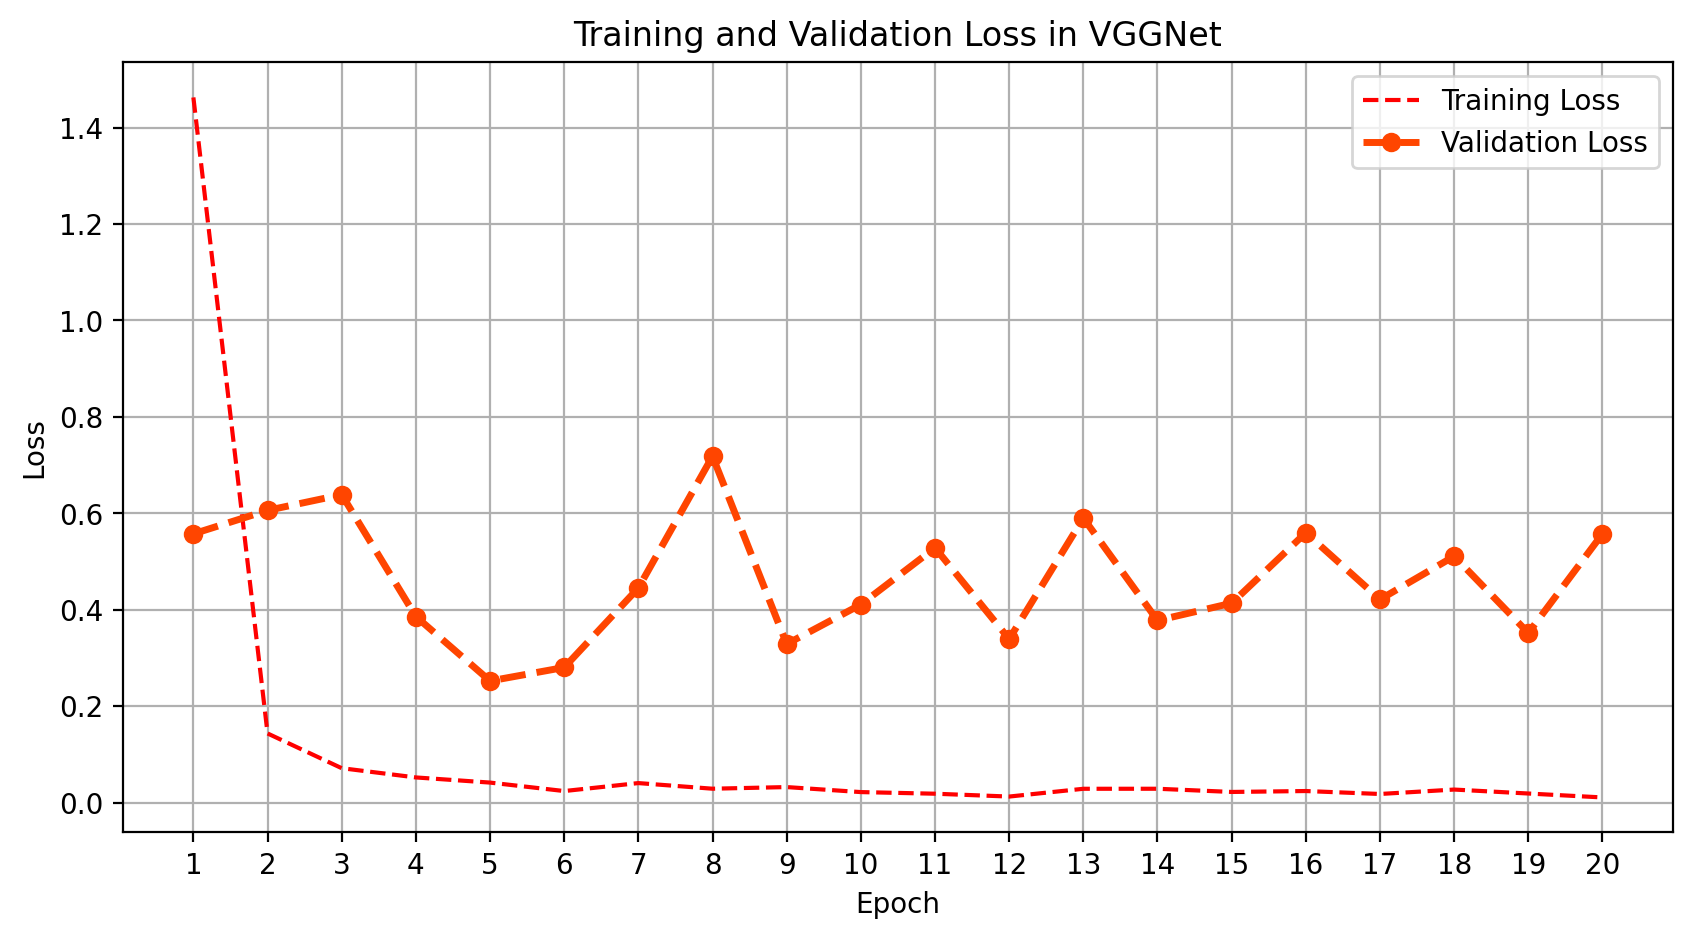

In [ ]:
# Plotting the loss
plt.figure(figsize=(10, 5), dpi=200)
plt.plot(epoch_count, train_loss_vgg, 'r--', label='Training Loss')
plt.plot(epoch_count, val_loss_vgg, '--bo', color='orangered', linewidth=2.5, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss in VGGNet')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(range(1, len(epoch_count) + 1))
plt.grid(True)
plt.show()

<ipython-input-34-45e066b342c1>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epoch_count, val_acc_vgg, '--bo', color='orangered', linewidth=2.5, label='Validation Accuracy')


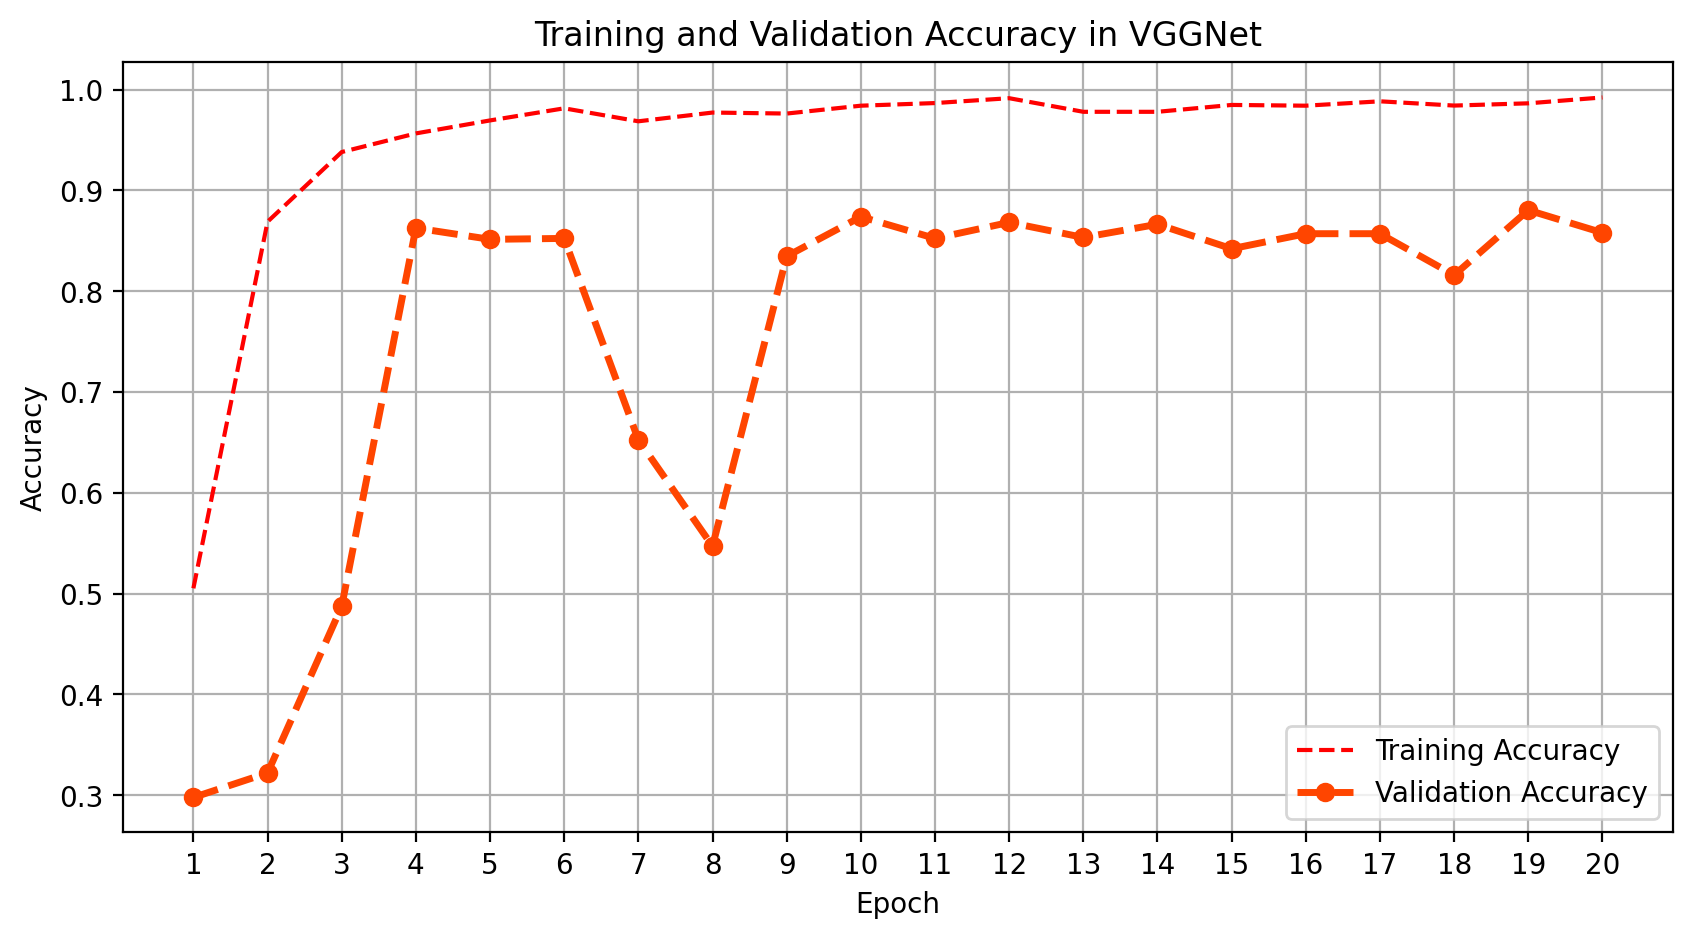

In [ ]:
# Plotting the accuracy
plt.figure(figsize=(10, 5), dpi=200)
plt.plot(epoch_count, train_acc_vgg, 'r--', label='Training Accuracy')
plt.plot(epoch_count, val_acc_vgg, '--bo', color='orangered', linewidth=2.5, label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy in VGGNet')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(range(1, len(epoch_count) + 1))
plt.grid(True)
plt.show()

**AlexNet**

---


AlexNet, introduced in 2012, revolutionized the field of computer vision with its pioneering convolutional neural network architecture. Comprising eight layers of learnable parameters, including five convolutional layers followed by max-pooling layers and three fully connected layers, AlexNet showcased several innovative features. Notably, it utilized large filter sizes, ReLU activation functions, and overlapping max-pooling with a stride of 2. Local Response Normalization (LRN) was applied after the first and second convolutional layers to enhance generalization, while dropout regularization mitigated overfitting in the fully connected layers. The final output layer employed softmax activation to produce class probabilities. Through these advancements and rigorous training with stochastic gradient descent and data augmentation, AlexNet achieved a remarkable top-5 error rate of 15.3% in the ImageNet Large Scale Visual Recognition Challenge, setting a new standard in image classification performance and catalyzing the widespread adoption of deep learning in computer vision tasks.

In [ ]:
def AlexNet(input_shape=(227, 227, 3), num_classes=1000):
    # Input layer
    inp = layers.Input(input_shape)

    # Convolutional layers
    x = layers.Conv2D(96, 11, strides=4, padding='valid', activation='relu')(inp)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(3, strides=2)(x)

    x = layers.Conv2D(256, 5, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(3, strides=2)(x)

    x = layers.Conv2D(384, 3, padding='same', activation='relu')(x)
    x = layers.Conv2D(384, 3, padding='same', activation='relu')(x)
    x = layers.Conv2D(256, 3, padding='same', activation='relu')(x)
    x = layers.MaxPooling2D(3, strides=2)(x)

    # Flatten layer
    x = layers.Flatten()(x)

    # Fully connected layers
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)

    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)

    # Output layer
    x = layers.Dense(num_classes, activation='softmax')(x)

    # Creating model
    Alex_model = models.Model(inputs=inp, outputs=x)

    return Alex_model

# Creating AlexNet model with modified parameters
Alex_model = AlexNet(input_shape=(227, 227, 3), num_classes=5)

# Printing model summary
Alex_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 conv2d_15 (Conv2D)          (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization_5 (Bat  (None, 55, 55, 96)        384       
 chNormalization)                                                
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 27, 27, 96)        0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_6 (Bat  (None, 27, 27, 256)       1024

Generating a visual representation of the AlexNet model architecture, including layer shapes and names, and saving it as an image file.

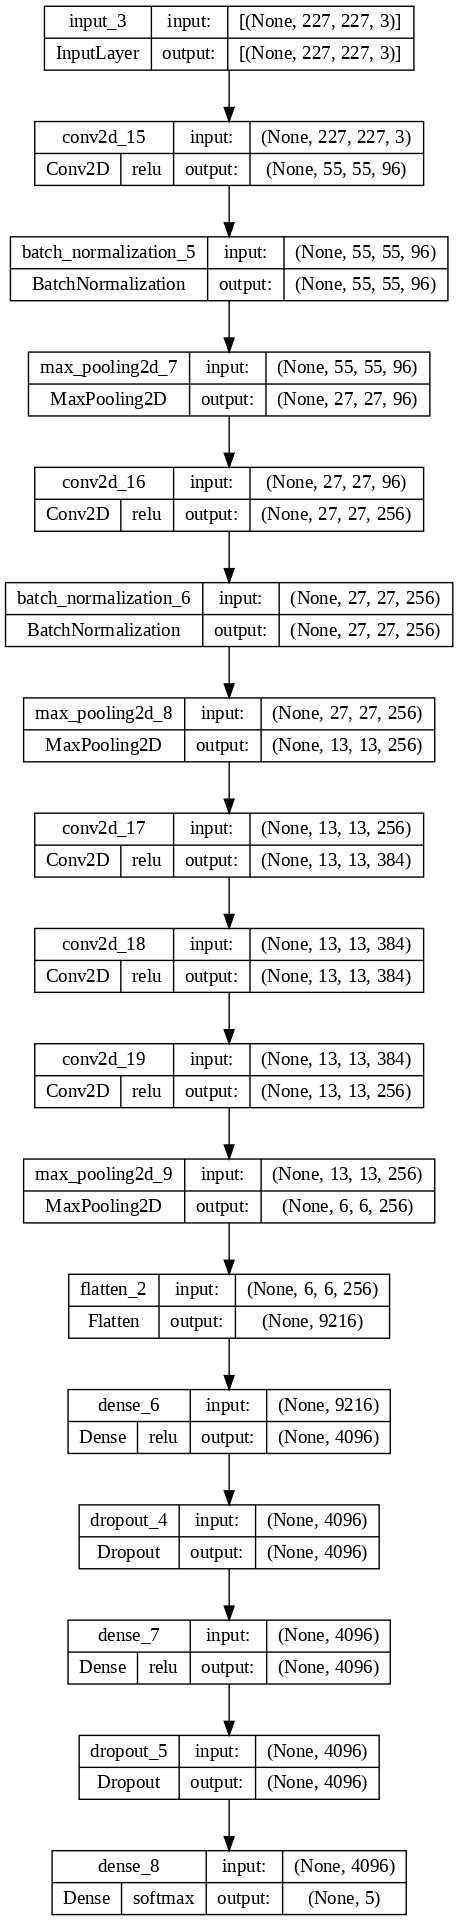

In [ ]:
tf.keras.utils.plot_model(
    Alex_model,
    to_file='Alex_net_model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    show_layer_activations=True,
    dpi=100
)


In [ ]:
Alex_model.compile(loss=BinaryCrossentropy(),
              optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
model_Alex = Alex_model.fit(trainDataset, epochs=20, validation_data=valDataset)

Epoch 1/20
127/127 [==============================] - 74s 557ms/step - loss: 0.7199 - accuracy: 0.4325 - val_loss: 0.4527 - val_accuracy: 0.4454
Epoch 2/20
127/127 [==============================] - 65s 512ms/step - loss: 0.2598 - accuracy: 0.7084 - val_loss: 0.5341 - val_accuracy: 0.6928
Epoch 3/20
127/127 [==============================] - 67s 525ms/step - loss: 0.1571 - accuracy: 0.8405 - val_loss: 0.6264 - val_accuracy: 0.7610
Epoch 4/20
127/127 [==============================] - 67s 527ms/step - loss: 0.1193 - accuracy: 0.8859 - val_loss: 0.5815 - val_accuracy: 0.7899
Epoch 5/20
127/127 [==============================] - 65s 511ms/step - loss: 0.0781 - accuracy: 0.9287 - val_loss: 0.7463 - val_accuracy: 0.8161
Epoch 6/20
127/127 [==============================] - 65s 513ms/step - loss: 0.0684 - accuracy: 0.9380 - val_loss: 0.5836 - val_accuracy: 0.8226
Epoch 7/20
127/127 [==============================] - 67s 525ms/step - loss: 0.0479 - accuracy: 0.9582 - val_loss: 0.7855 - val_ac

In [ ]:
# Save the model architecture to JSON file
model_json = Alex_model.to_json()
with open("alex_model.json", "w") as json_file:
    json_file.write(model_json)

# Save the weights to HDF5 file
Alex_model.save_weights("alex_model_weights.h5")

**Output**

In [ ]:
train_loss_alex = model_Alex.history['loss']
val_loss_alex = model_Alex.history['val_loss']
train_acc_alex = model_Alex.history['accuracy']
val_acc_alex = model_Alex.history['val_accuracy']
epoch_count = range(1, len(train_loss_alex) + 1)

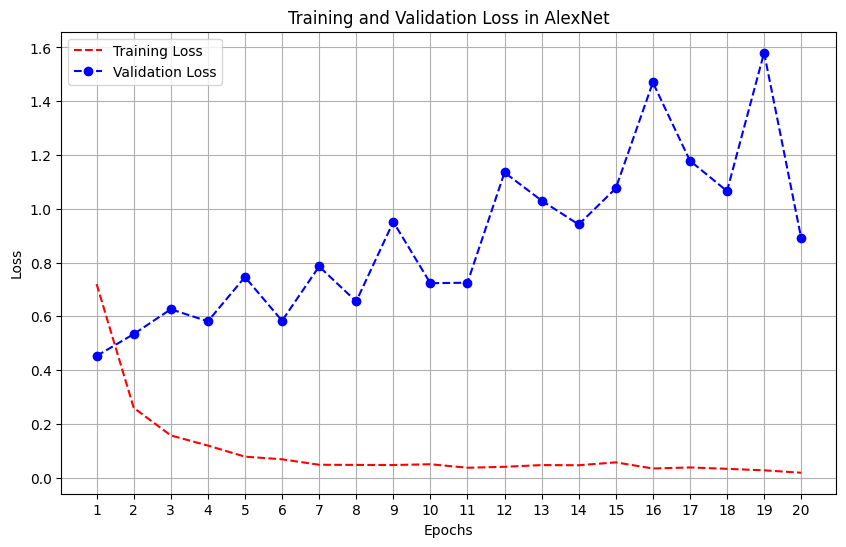

In [ ]:
# Visualize loss history
plt.figure(figsize=(10, 6))
plt.plot(epoch_count, train_loss_alex, 'r--', label='Training Loss')
plt.plot(epoch_count, val_loss_alex, '--bo', label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss in AlexNet')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(range(1, len(epoch_count)+1))
plt.grid(True)
plt.show()

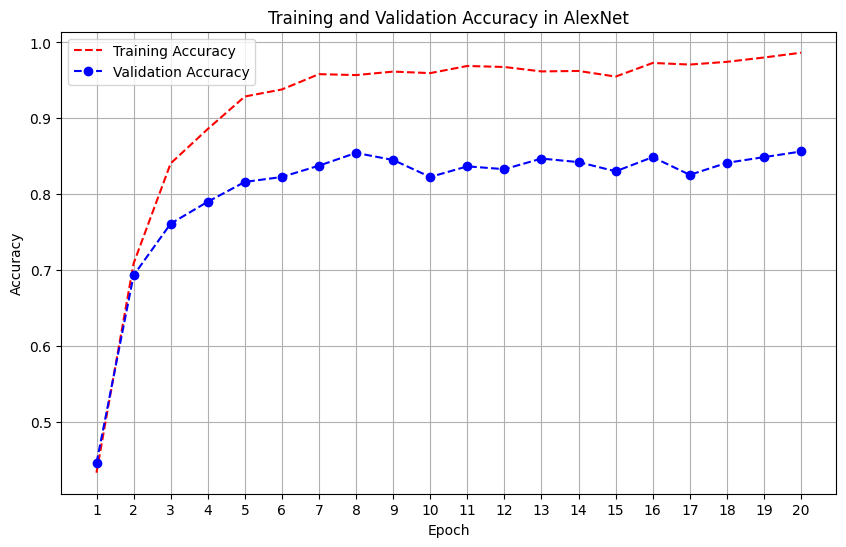

In [ ]:
# Visualize accuracy history
plt.figure(figsize=(10, 6))
plt.plot(epoch_count, train_acc_alex, 'r--', label='Training Accuracy')
plt.plot(epoch_count, val_acc_alex, '--bo', label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy in AlexNet')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(range(1, len(epoch_count)+1))
plt.grid(True)
plt.show()

**ResNet:**

ResNet, short for Residual Network, introduced by Kaiming He et al. in 2015, is a groundbreaking deep convolutional neural network architecture known for its novel residual learning framework. ResNet addresses the degradation problem faced by traditional deep networks as they become deeper, where the accuracy saturates and then degrades rapidly due to vanishing gradients. The core innovation of ResNet lies in the introduction of residual blocks, which enable the network to learn residual mappings rather than directly learning the desired underlying mapping. By introducing skip connections that bypass one or more layers, ResNet facilitates the training of extremely deep networks, leading to improved accuracy and performance. The skip connections allow the gradients to flow more efficiently during training, mitigating the vanishing gradient problem and enabling the successful training of networks with hundreds or even thousands of layers. ResNet architectures, ranging from ResNet-18 to ResNet-152, have become fundamental building blocks for various computer vision tasks, including image classification, object detection, and image segmentation, setting new benchmarks in accuracy and scalability in the field of deep learning.

**Model**

In [ ]:
def ResNet34():
    # Input layer with shape (227, 227, 3)
    inp = layers.Input((227, 227, 3))

    # Initial convolutional layer with 64 filters, 7x7 kernel, and stride of 2
    x = layers.Conv2D(64, 7, 2, padding='valid', activation='relu')(inp)

    # Max pooling layer with a 3x3 pool size and stride of 2
    x = layers.MaxPooling2D(strides=2, padding='same')(x)

    # First set of residual blocks with 64 filters
    x = layers.Conv2D(64, 3, 1, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, 3, 1, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, 3, 1, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, 3, 1, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)

    # Second set of residual blocks with 128 filters
    x = layers.Conv2D(128, 3, 2, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, 3, 1, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, 3, 1, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, 3, 1, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)

    # Third set of residual blocks with 256 filters
    x = layers.Conv2D(256, 3, 2, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(256, 3, 1, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(256, 3, 1, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(256, 3, 1, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(256, 3, 1, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(256, 3, 1, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)

    # Fourth set of residual blocks with 512 filters
    x = layers.Conv2D(512, 3, 2, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(512, 3, 1, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(512, 3, 1, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)

    # Global average pooling
    x = layers.GlobalAveragePooling2D()(x)

    # Dense layers
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)

    # Output layer with softmax activation for classification
    x = layers.Dense(5, activation='softmax')(x)  # Assuming 5 classes

    # Create the ResNet model
    Res_model = models.Model(inputs=inp, outputs=x)

    return Res_model

# Creating ResNet34 model instance
Res_model = ResNet34()

# Displaying model summary
Res_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 conv2d_20 (Conv2D)          (None, 111, 111, 64)      9472      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 56, 56, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 56, 56, 64)        36928     
                                                                 
 batch_normalization_7 (Bat  (None, 56, 56, 64)        256       
 chNormalization)                                                
                                                                 
 conv2d_22 (Conv2D)          (None, 56, 56, 64)        3692

Generating a visual representation of the ResNet model architecture, including layer shapes and names, and saving it as an image file.

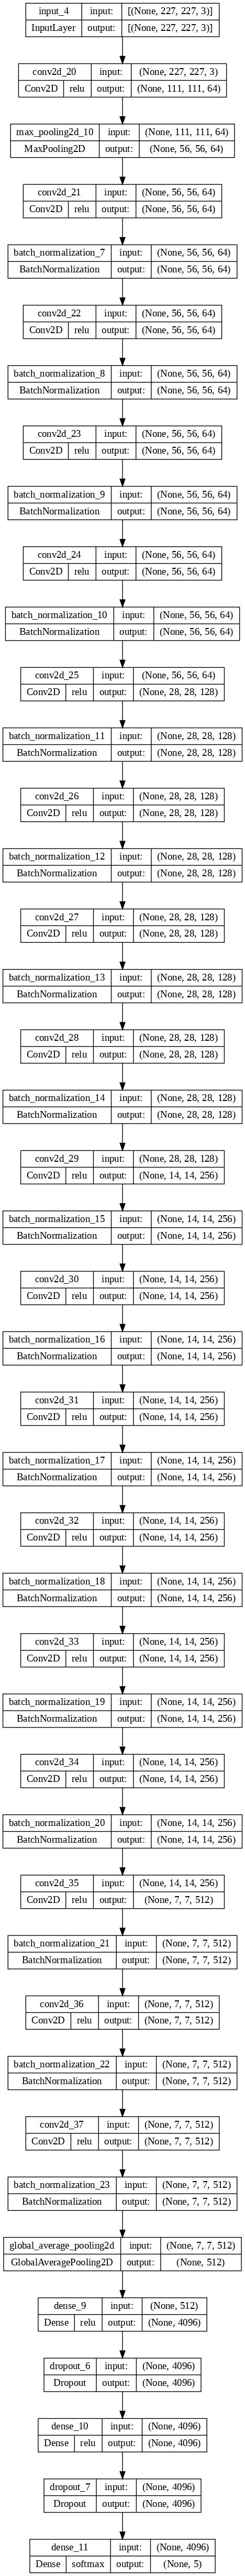

In [ ]:
tf.keras.utils.plot_model(
    Res_model,
    to_file='ResNet_model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    show_layer_activations=True,
    dpi=100
)

In [ ]:
Res_model.compile(loss=BinaryCrossentropy(),
              optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
model_Res = Res_model.fit(trainDataset, epochs=20, validation_data=valDataset)

Epoch 1/20
127/127 [==============================] - 79s 507ms/step - loss: 0.3505 - accuracy: 0.5674 - val_loss: 7.5881 - val_accuracy: 0.2577
Epoch 2/20
127/127 [==============================] - 66s 519ms/step - loss: 0.1787 - accuracy: 0.8180 - val_loss: 1.5641 - val_accuracy: 0.4491
Epoch 3/20
127/127 [==============================] - 60s 472ms/step - loss: 0.1406 - accuracy: 0.8648 - val_loss: 3.9207 - val_accuracy: 0.3725
Epoch 4/20
127/127 [==============================] - 61s 481ms/step - loss: 0.0866 - accuracy: 0.9253 - val_loss: 1.6567 - val_accuracy: 0.3828
Epoch 5/20
127/127 [==============================] - 63s 495ms/step - loss: 0.0630 - accuracy: 0.9452 - val_loss: 2.0969 - val_accuracy: 0.3697
Epoch 6/20
127/127 [==============================] - 62s 485ms/step - loss: 0.0446 - accuracy: 0.9623 - val_loss: 0.6912 - val_accuracy: 0.6312
Epoch 7/20
127/127 [==============================] - 65s 508ms/step - loss: 0.0395 - accuracy: 0.9663 - val_loss: 0.4815 - val_ac

In [ ]:
# Save the model architecture to JSON file
res_model_json = Res_model.to_json()
with open("res_model.json", "w") as json_file:
    json_file.write(res_model_json)

# Save the weights to HDF5 file
Res_model.save_weights("res_model_weights.h5")

**Output**

In [ ]:
train_loss_res = model_Res.history['loss']
val_loss_res =model_Res.history['val_loss']
train_acc_res = model_Res.history['accuracy']
val_acc_res = model_Res.history['val_accuracy']
epoch_count = range(1, len(train_loss_res) + 1)

<ipython-input-60-7b8909acd48c>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epoch_count, val_loss_res, '--bo', color='orangered', linewidth=2.5, label='Validation Loss')


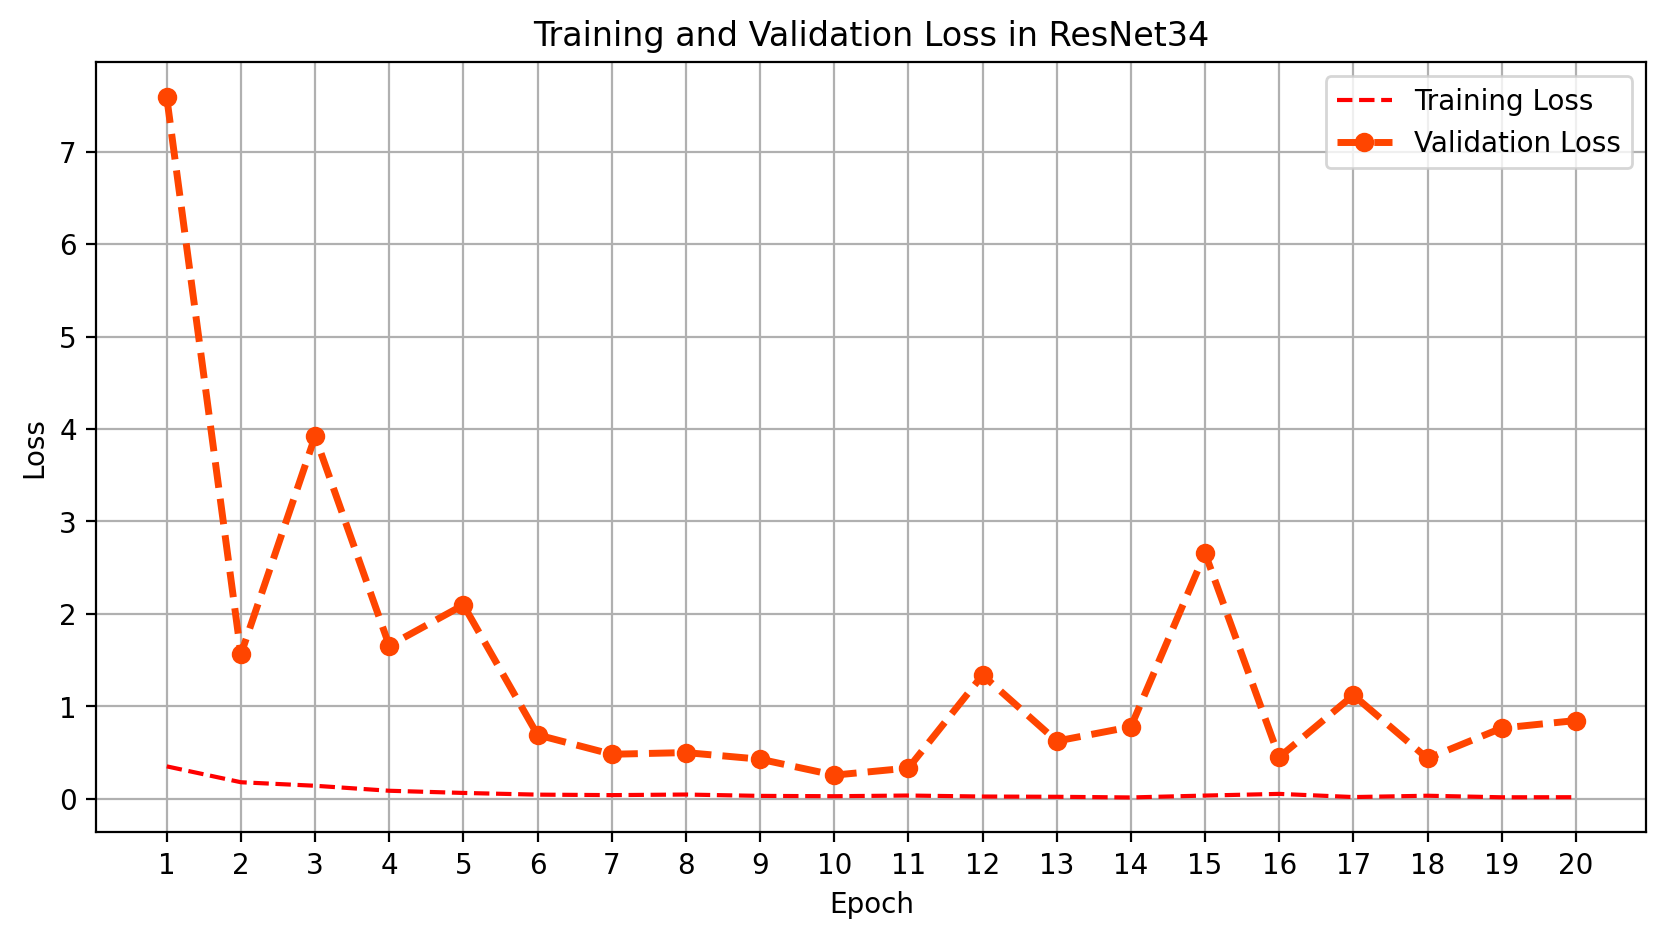

In [ ]:
# Plotting the loss
plt.figure(figsize=(10, 5), dpi=200)
plt.plot(epoch_count, train_loss_res, 'r--', label='Training Loss')
plt.plot(epoch_count, val_loss_res, '--bo', color='orangered', linewidth=2.5, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss in ResNet34')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(range(1, len(epoch_count) + 1))
plt.grid(True)
plt.show()

<ipython-input-61-e6e93d54a9f9>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epoch_count, val_acc_res, '--bo', color='orangered', linewidth=2.5, label='Validation Accuracy')


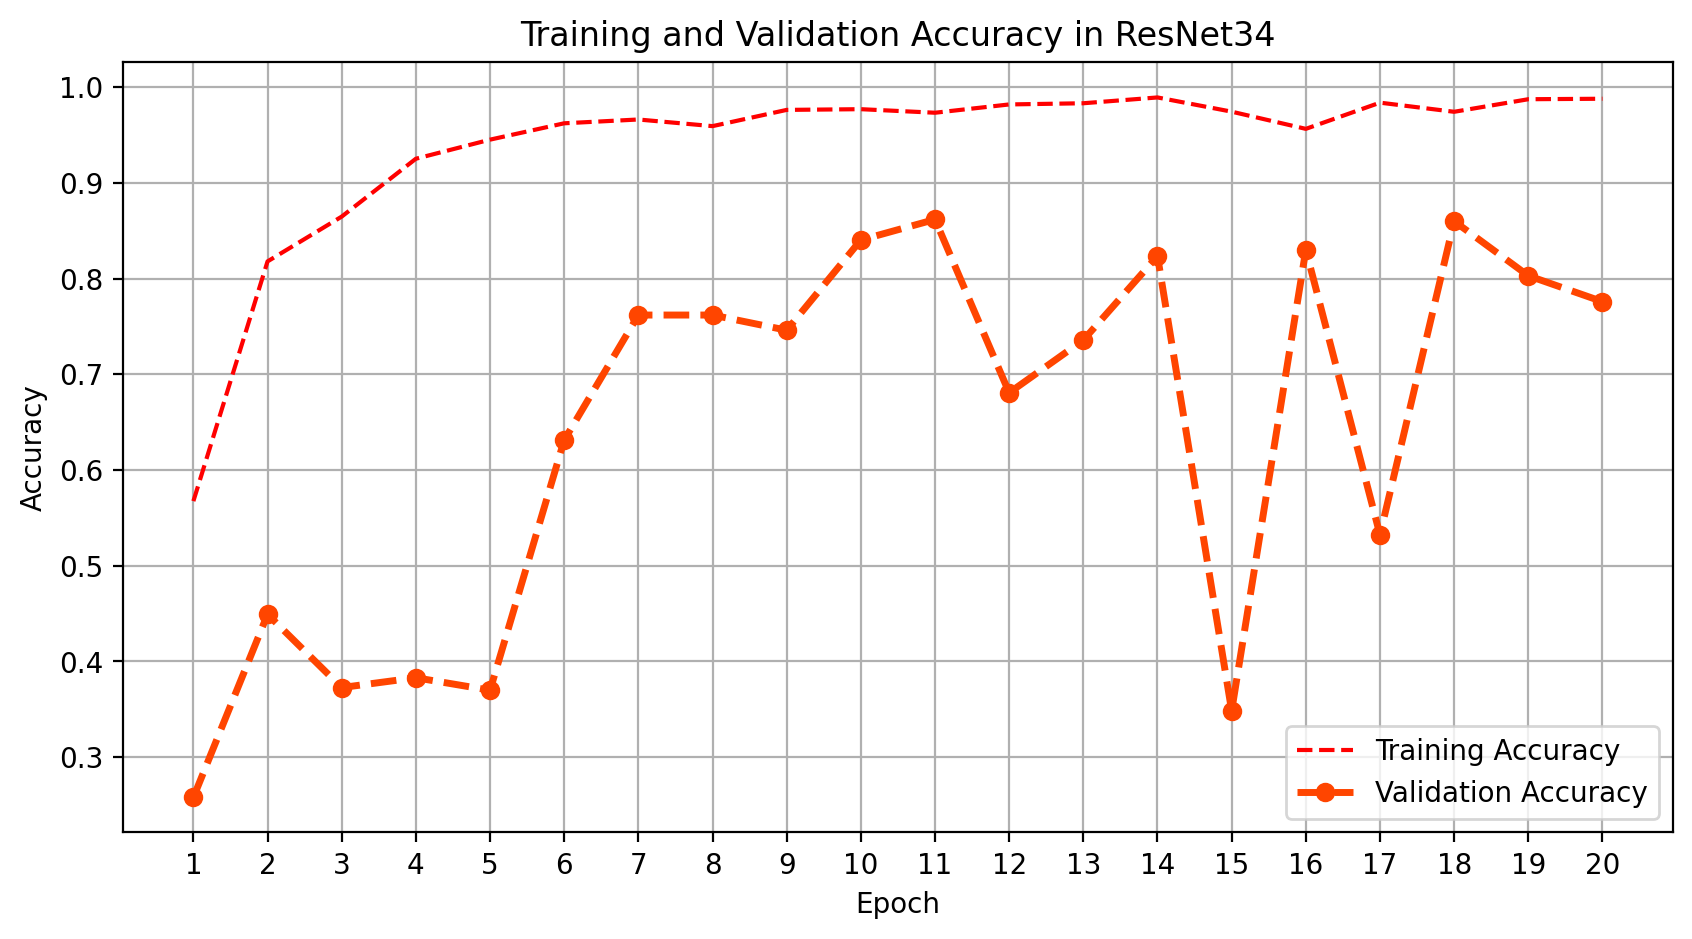

In [ ]:
# Plotting the accuracy
plt.figure(figsize=(10, 5), dpi=200)
plt.plot(epoch_count, train_acc_res, 'r--', label='Training Accuracy')
plt.plot(epoch_count, val_acc_res, '--bo', color='orangered', linewidth=2.5, label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy in ResNet34')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(range(1, len(epoch_count) + 1))
plt.grid(True)
plt.show()

**InceptionV1:** InceptionV1, also known as GoogLeNet, stands as a pioneering convolutional neural network architecture introduced by Szegedy et al. in 2014. Designed to excel in image classification tasks, it innovatively employs inception modules, allowing for the simultaneous application of convolutions with varying kernel sizes to capture local and global features efficiently. This architecture incorporates 1x1 convolutions for dimensionality reduction, stacked inception modules interspersed with max-pooling layers for hierarchical feature extraction, and auxiliary classifiers to address the vanishing gradient problem. Through techniques like global average pooling and fully connected layers, InceptionV1 achieves a balance between model complexity and computational efficiency, making it a significant advancement in the realm of deep learning for computer vision applications.

**Model**

In [ ]:
def InceptionV1():
    # Input layer with shape (224, 224, 3)
    inp = layers.Input((224, 224, 3))

    # Convolutional layers
    x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(inp)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = layers.Conv2D(64, (1, 1), strides=(1, 1), padding='same', activation='relu')(x)
    x = layers.Conv2D(192, (3, 3), strides=(1, 1), padding='same', activation='relu')(x)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # Inception modules
    tower_1 = layers.Conv2D(64, (1, 1), padding='same', activation='relu')(x)
    tower_1 = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(tower_1)
    tower_2 = layers.Conv2D(32, (1, 1), padding='same', activation='relu')(x)
    tower_2 = layers.Conv2D(32, (5, 5), padding='same', activation='relu')(tower_2)
    tower_3 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    tower_3 = layers.Conv2D(32, (1, 1), padding='same', activation='relu')(tower_3)
    x = layers.concatenate([tower_1, tower_2, tower_3], axis=3)

    tower_1 = layers.Conv2D(128, (1, 1), padding='same', activation='relu')(x)
    tower_1 = layers.Conv2D(192, (3, 3), padding='same', activation='relu')(tower_1)
    tower_2 = layers.Conv2D(96, (1, 1), padding='same', activation='relu')(x)
    tower_2 = layers.Conv2D(208, (5, 5), padding='same', activation='relu')(tower_2)
    tower_3 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    tower_3 = layers.Conv2D(16, (1, 1), padding='same', activation='relu')(tower_3)
    x = layers.concatenate([tower_1, tower_2, tower_3], axis=3)

    # Global average pooling layer
    x = layers.GlobalAveragePooling2D()(x)

    # Dense layers
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.4)(x)
    x = layers.Dense(5, activation='softmax')(x)  # Assuming 5 classes

    # Create the modified InceptionV1 model
    Inception = models.Model(inputs=inp, outputs=x)

    return Inception

# Assuming you have trainDataset and valDataset prepared

# Creating the modified InceptionV1 model instance
Inception = InceptionV1()

# Displaying the model summary
Inception.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_39 (Conv2D)          (None, 112, 112, 64)         9472      ['input_4[0][0]']             
                                                                                                  
 max_pooling2d_12 (MaxPooli  (None, 56, 56, 64)           0         ['conv2d_39[0][0]']           
 ng2D)                                                                                            
                                                                                                  
 conv2d_40 (Conv2D)          (None, 56, 56, 64)           4160      ['max_pooling2d_12[0][0]

Generating a visual representation of the Inception model architecture, including layer shapes and names, and saving it as an image file.

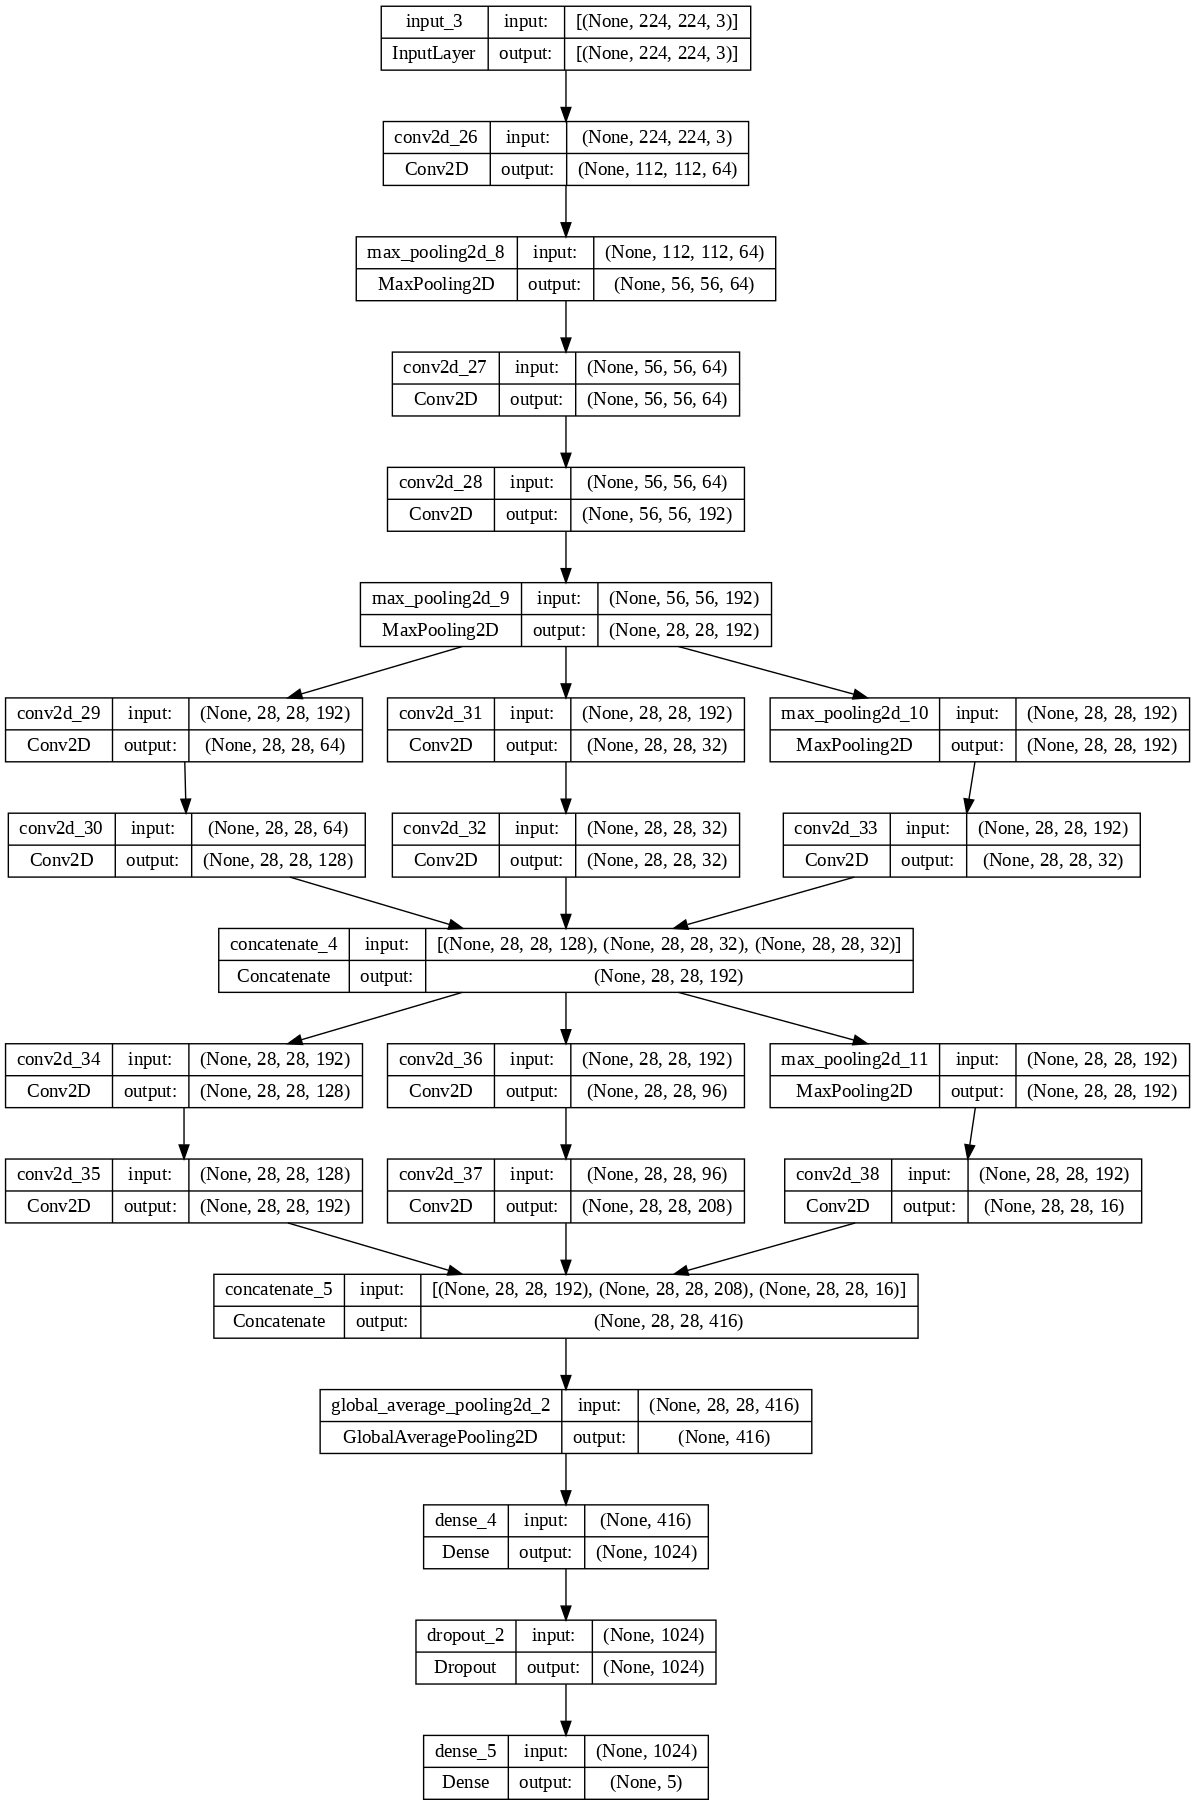

In [ ]:
tf.keras.utils.plot_model(
    Inception,
    to_file='InceptionV1_model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    dpi=100
)

In [ ]:
Inception.compile(loss=CategoricalCrossentropy(),
                  optimizer=Adam(learning_rate=0.001),
                  metrics=['accuracy'])

In [ ]:
history = Inception.fit(trainDataset, epochs=20, validation_data=valDataset)

Epoch 1/20
127/127 [==============================] - 69s 502ms/step - loss: 0.5107 - accuracy: 0.2004 - val_loss: 0.5013 - val_accuracy: 0.1895
Epoch 2/20
127/127 [==============================] - 67s 526ms/step - loss: 0.5024 - accuracy: 0.1999 - val_loss: 0.5016 - val_accuracy: 0.1895
Epoch 3/20
127/127 [==============================] - 65s 511ms/step - loss: 0.5017 - accuracy: 0.2151 - val_loss: 0.5005 - val_accuracy: 0.2054
Epoch 4/20
127/127 [==============================] - 64s 503ms/step - loss: 0.5019 - accuracy: 0.2015 - val_loss: 0.4968 - val_accuracy: 0.2129
Epoch 5/20
127/127 [==============================] - 63s 498ms/step - loss: 0.4985 - accuracy: 0.2359 - val_loss: 0.4836 - val_accuracy: 0.2941
Epoch 6/20
127/127 [==============================] - 63s 494ms/step - loss: 0.4401 - accuracy: 0.3560 - val_loss: 0.4568 - val_accuracy: 0.4062
Epoch 7/20
127/127 [==============================] - 65s 508ms/step - loss: 0.3734 - accuracy: 0.4504 - val_loss: 0.4131 - val_ac

In [ ]:
# Saving the model
Inception.save("inception_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Output**

In [ ]:
train_loss_inception = history.history['loss']
val_loss_inception = history.history['val_loss']
train_acc_inception = history.history['accuracy']
val_acc_inception = history.history['val_accuracy']
epoch_count = range(1, len(train_loss_inception) + 1)

<ipython-input-38-1b51055751b6>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epoch_count, val_loss_inception, '--bo', color='orangered', linewidth=2.5, label='Validation Loss')


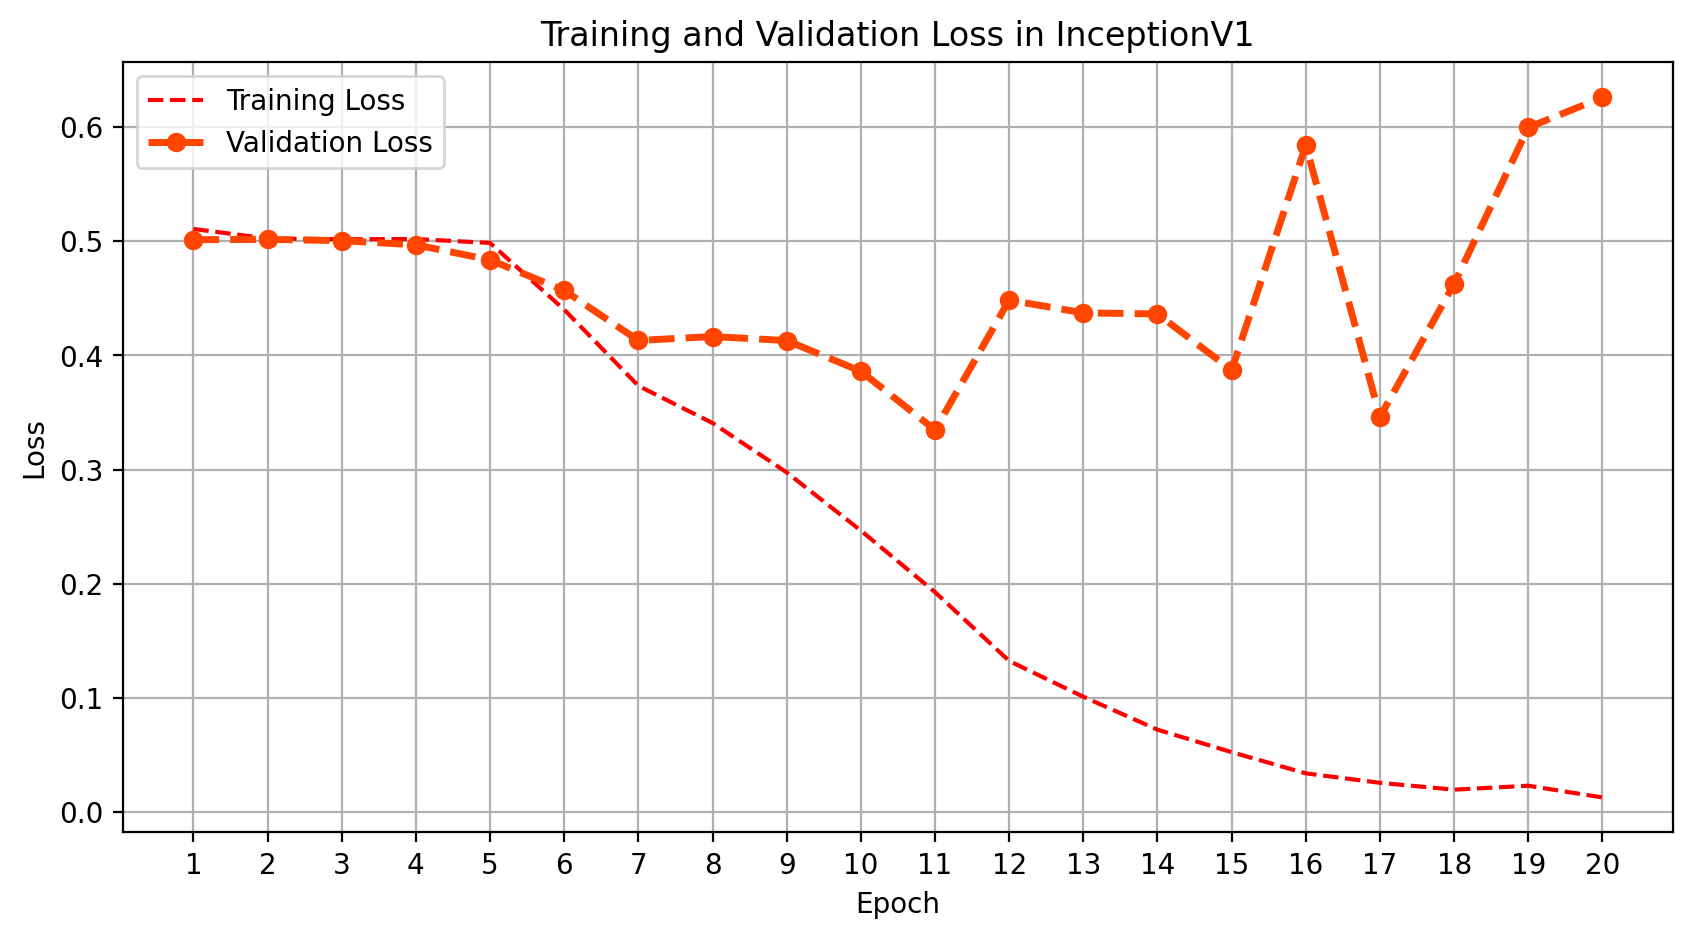

In [ ]:
# Plotting the loss
plt.figure(figsize=(10, 5), dpi=200)
plt.plot(epoch_count, train_loss_inception, 'r--', label='Training Loss')
plt.plot(epoch_count, val_loss_inception, '--bo', color='orangered', linewidth=2.5, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss in InceptionV1')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(range(1, len(epoch_count) + 1))
plt.grid(True)
plt.show()

<ipython-input-39-84cbfccd596c>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epoch_count, val_acc_inception, '--bo', color='orangered', linewidth=2.5, label='Validation Accuracy')


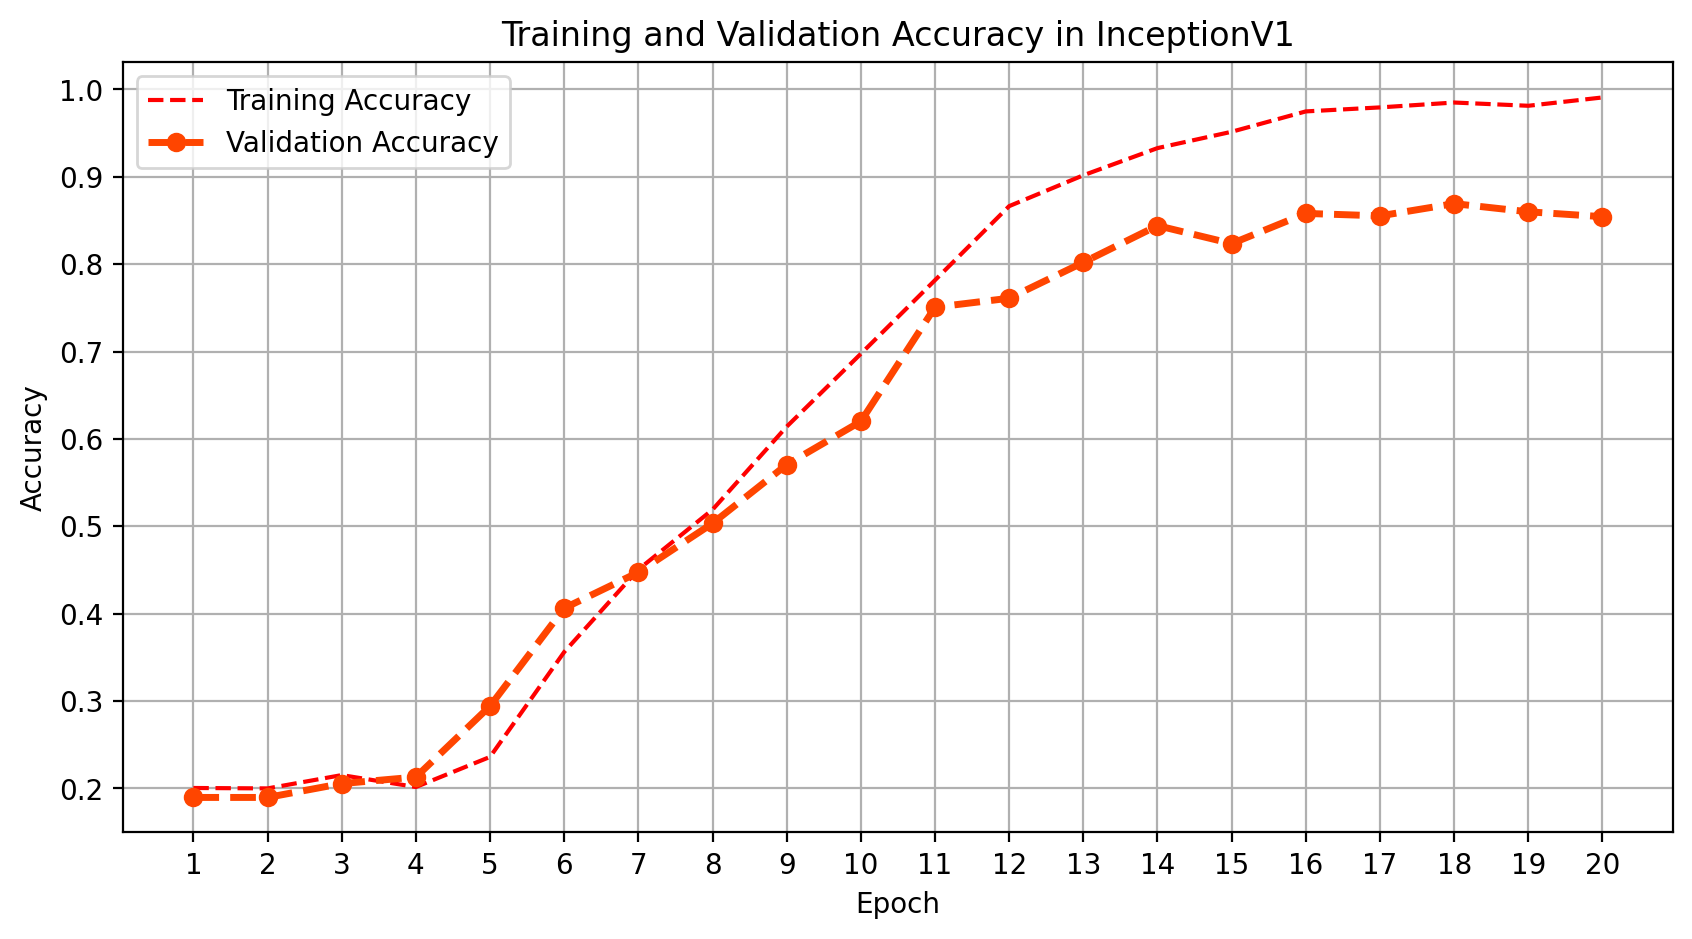

In [ ]:
# Plotting the accuracy
plt.figure(figsize=(10, 5), dpi=200)
plt.plot(epoch_count, train_acc_inception, 'r--', label='Training Accuracy')
plt.plot(epoch_count, val_acc_inception, '--bo', color='orangered', linewidth=2.5, label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy in InceptionV1')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(range(1, len(epoch_count) + 1))
plt.grid(True)
plt.show()

Hyperparameter tuning of Inception model

In [ ]:

def train_model(learning_rate, dropout_rate):
    # Compile the model with given learning rate
    optimizer = Adam(lr=learning_rate)
    Inception.compile(optimizer=optimizer, loss='BinaryCrossentropy', metrics=['accuracy'])

    # Train the model for 5 epochs
    history = Inception.fit(trainDataset, epochs=5, validation_data=valDataset)

    # Return the model and its history
    return Inception, history

In [ ]:
# Creating lists of learning rates and dropout rates
learning_rates = [0.0001, 0.001, 0.01]
dropout_rates = [0.2, 0.4, 0.6]

best_accuracy = 0.0
best_learning_rate = 0.0
best_dropout_rate = 0.0
best_model = None
best_history = None

# Iterating over all combinations of learning rates and dropout rates
for lr in learning_rates:
    for dropout in dropout_rates:
        print(f"Training model with lr={lr}, dropout={dropout}")
        # Training the model
        model, history = train_model(lr, dropout)

        # Evaluating the model using the test dataset generator
        evaluation = model.evaluate(testDataset)
        accuracy = evaluation[1]
        print(f"Test accuracy with lr={lr}, dropout={dropout}: {accuracy}")

        # Checking if this model has the best accuracy so far
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_learning_rate = lr
            best_dropout_rate = dropout
            best_model = model
            best_history = history

print("Best learning rate:", best_learning_rate)
print("Best dropout rate:", best_dropout_rate)

Training model with lr=0.0001, dropout=0.2
Epoch 1/5
127/127 [==============================] - 64s 469ms/step - loss: 0.0198 - accuracy: 0.9843 - val_loss: 0.5555 - val_accuracy: 0.8730
Epoch 2/5
127/127 [==============================] - 62s 490ms/step - loss: 0.0148 - accuracy: 0.9885 - val_loss: 0.4511 - val_accuracy: 0.8730
Epoch 3/5
127/127 [==============================] - 61s 483ms/step - loss: 0.0173 - accuracy: 0.9859 - val_loss: 0.3764 - val_accuracy: 0.8646
Epoch 4/5
127/127 [==============================] - 61s 484ms/step - loss: 0.0058 - accuracy: 0.9959 - val_loss: 0.3545 - val_accuracy: 0.8543
Epoch 5/5
26/26 [==============================] - 319s 13s/step - loss: 0.0117 - accuracy: 0.9932


Test accuracy with lr=0.0001, dropout=0.2: 0.9931676983833313
Training model with lr=0.0001, dropout=0.4
Epoch 1/5
127/127 [==============================] - 63s 456ms/step - loss: 0.0198 - accuracy: 0.9849 - val_loss: 0.5565 - val_accuracy: 0.8768
Epoch 2/5
127/127 [==============================] - 61s 483ms/step - loss: 0.0051 - accuracy: 0.9967 - val_loss: 0.5657 - val_accuracy: 0.8749
Epoch 3/5
127/127 [==============================] - 59s 463ms/step - loss: 0.0049 - accuracy: 0.9963 - val_loss: 0.4653 - val_accuracy: 0.8599
Epoch 4/5
127/127 [==============================] - 60s 470ms/step - loss: 0.0102 - accuracy: 0.9916 - val_loss: 0.4458 - val_accuracy: 0.8721
Epoch 5/5
26/26 [==============================] - 10s 375ms/step - loss: 0.0259 - accuracy: 0.9776


Test accuracy with lr=0.0001, dropout=0.4: 0.9776397347450256
Training model with lr=0.0001, dropout=0.6
Epoch 1/5
127/127 [==============================] - 63s 465ms/step - loss: 0.0092 - accuracy: 0.9923 - val_loss: 0.5023 - val_accuracy: 0.8796
Epoch 2/5
127/127 [==============================] - 60s 471ms/step - loss: 0.0126 - accuracy: 0.9900 - val_loss: 0.5791 - val_accuracy: 0.8721
Epoch 3/5
127/127 [==============================] - 59s 468ms/step - loss: 0.0080 - accuracy: 0.9931 - val_loss: 0.5217 - val_accuracy: 0.8562
Epoch 4/5
127/127 [==============================] - 59s 466ms/step - loss: 0.0118 - accuracy: 0.9912 - val_loss: 0.4291 - val_accuracy: 0.8553
Epoch 5/5
26/26 [==============================] - 10s 397ms/step - loss: 0.0148 - accuracy: 0.9876


Test accuracy with lr=0.0001, dropout=0.6: 0.9875776171684265
Training model with lr=0.001, dropout=0.2
Epoch 1/5
127/127 [==============================] - 64s 472ms/step - loss: 0.0091 - accuracy: 0.9931 - val_loss: 0.4489 - val_accuracy: 0.8711
Epoch 2/5
127/127 [==============================] - 59s 461ms/step - loss: 0.0020 - accuracy: 0.9985 - val_loss: 0.4784 - val_accuracy: 0.8702
Epoch 3/5
127/127 [==============================] - 60s 470ms/step - loss: 0.0189 - accuracy: 0.9838 - val_loss: 0.3893 - val_accuracy: 0.8562
Epoch 4/5
127/127 [==============================] - 59s 463ms/step - loss: 0.0045 - accuracy: 0.9967 - val_loss: 0.4696 - val_accuracy: 0.8721
Epoch 5/5
26/26 [==============================] - 10s 377ms/step - loss: 0.0065 - accuracy: 0.9950


Test accuracy with lr=0.001, dropout=0.2: 0.9950310587882996
Training model with lr=0.001, dropout=0.4
Epoch 1/5
127/127 [==============================] - 64s 469ms/step - loss: 0.0128 - accuracy: 0.9901 - val_loss: 0.5925 - val_accuracy: 0.8665
Epoch 2/5
127/127 [==============================] - 62s 487ms/step - loss: 0.0014 - accuracy: 0.9988 - val_loss: 0.5962 - val_accuracy: 0.8739
Epoch 3/5
127/127 [==============================] - 61s 477ms/step - loss: 2.7377e-04 - accuracy: 0.9998 - val_loss: 0.6374 - val_accuracy: 0.8702
Epoch 4/5
127/127 [==============================] - 58s 459ms/step - loss: 0.0109 - accuracy: 0.9908 - val_loss: 0.5448 - val_accuracy: 0.8571
Epoch 5/5
26/26 [==============================] - 10s 371ms/step - loss: 0.0377 - accuracy: 0.9764


Test accuracy with lr=0.001, dropout=0.4: 0.9763975143432617
Training model with lr=0.001, dropout=0.6
Epoch 1/5
127/127 [==============================] - 64s 472ms/step - loss: 0.0103 - accuracy: 0.9916 - val_loss: 0.6803 - val_accuracy: 0.8683
Epoch 2/5
127/127 [==============================] - 60s 471ms/step - loss: 0.0072 - accuracy: 0.9944 - val_loss: 0.3684 - val_accuracy: 0.8749
Epoch 3/5
127/127 [==============================] - 62s 490ms/step - loss: 0.0034 - accuracy: 0.9973 - val_loss: 0.6096 - val_accuracy: 0.8777
Epoch 4/5
127/127 [==============================] - 60s 467ms/step - loss: 7.5740e-04 - accuracy: 0.9996 - val_loss: 0.5603 - val_accuracy: 0.8777
Epoch 5/5
26/26 [==============================] - 10s 389ms/step - loss: 0.0238 - accuracy: 0.9826


Test accuracy with lr=0.001, dropout=0.6: 0.9826086759567261
Training model with lr=0.01, dropout=0.2
Epoch 1/5
127/127 [==============================] - 65s 465ms/step - loss: 0.0066 - accuracy: 0.9947 - val_loss: 0.6255 - val_accuracy: 0.8749
Epoch 2/5
127/127 [==============================] - 61s 481ms/step - loss: 0.0100 - accuracy: 0.9926 - val_loss: 0.4182 - val_accuracy: 0.8702
Epoch 3/5
127/127 [==============================] - 59s 464ms/step - loss: 0.0028 - accuracy: 0.9981 - val_loss: 0.7467 - val_accuracy: 0.8814
Epoch 4/5
127/127 [==============================] - 60s 475ms/step - loss: 3.1972e-04 - accuracy: 0.9999 - val_loss: 0.7266 - val_accuracy: 0.8786
Epoch 5/5
26/26 [==============================] - 10s 377ms/step - loss: 0.0229 - accuracy: 0.9863


Test accuracy with lr=0.01, dropout=0.2: 0.9863353967666626
Training model with lr=0.01, dropout=0.4
Epoch 1/5
127/127 [==============================] - 61s 451ms/step - loss: 0.0064 - accuracy: 0.9948 - val_loss: 0.4827 - val_accuracy: 0.8702
Epoch 2/5
127/127 [==============================] - 59s 460ms/step - loss: 0.0032 - accuracy: 0.9975 - val_loss: 0.5954 - val_accuracy: 0.8646
Epoch 3/5
127/127 [==============================] - 58s 456ms/step - loss: 0.0070 - accuracy: 0.9945 - val_loss: 0.6316 - val_accuracy: 0.8599
Epoch 4/5
127/127 [==============================] - 58s 458ms/step - loss: 0.0093 - accuracy: 0.9943 - val_loss: 0.7387 - val_accuracy: 0.8796
Epoch 5/5
26/26 [==============================] - 10s 374ms/step - loss: 0.0095 - accuracy: 0.9913


Test accuracy with lr=0.01, dropout=0.4: 0.991304337978363
Training model with lr=0.01, dropout=0.6
Epoch 1/5
127/127 [==============================] - 62s 459ms/step - loss: 0.0092 - accuracy: 0.9937 - val_loss: 0.5138 - val_accuracy: 0.8646
Epoch 2/5
127/127 [==============================] - 61s 482ms/step - loss: 0.0016 - accuracy: 0.9988 - val_loss: 0.6526 - val_accuracy: 0.8665
Epoch 3/5
127/127 [==============================] - 58s 456ms/step - loss: 0.0087 - accuracy: 0.9929 - val_loss: 0.8662 - val_accuracy: 0.8842
Epoch 4/5
127/127 [==============================] - 57s 452ms/step - loss: 0.0016 - accuracy: 0.9988 - val_loss: 0.4205 - val_accuracy: 0.8693
Epoch 5/5
26/26 [==============================] - 10s 366ms/step - loss: 0.0054 - accuracy: 0.9957
Test accuracy with lr=0.01, dropout=0.6: 0.9956521987915039
Best learning rate: 0.01
Best dropout rate: 0.6


**Comparing the models**

**Model Performance Analysis**:
1. **VGG Model**:
Training Loss/Accuracy: The VGG model achieves a training loss of 0.0739 and accuracy of 96.29% after 20 epochs.
Validation Loss/Accuracy: It achieves a validation loss of 0.7891 and accuracy of 66.79%.
2. **AlexNet Model**:
Training Loss/Accuracy: The AlexNet model achieves a training loss of 0.0309 and accuracy of 97.67% after 20 epochs.
Validation Loss/Accuracy: It achieves a validation loss of 0.4049 and accuracy of 85.66%.
3. **ResNet Model**:
Training Loss/Accuracy: The ResNet model achieves a training loss of 0.0089 and accuracy of 99.29% after 20 epochs.
Validation Loss/Accuracy: It achieves a validation loss of 0.6514 and accuracy of 87.79%.
4. **Inception Model**:
Training Loss/Accuracy: The Inception model achieves a training loss of 0.0148 and accuracy of 98.93% after 20 epochs.
Validation Loss/Accuracy: It achieves a validation loss of 0.4047 and accuracy of 87.14%.

Putting all of the results in a one plot and comparing the behavior of models outputs.

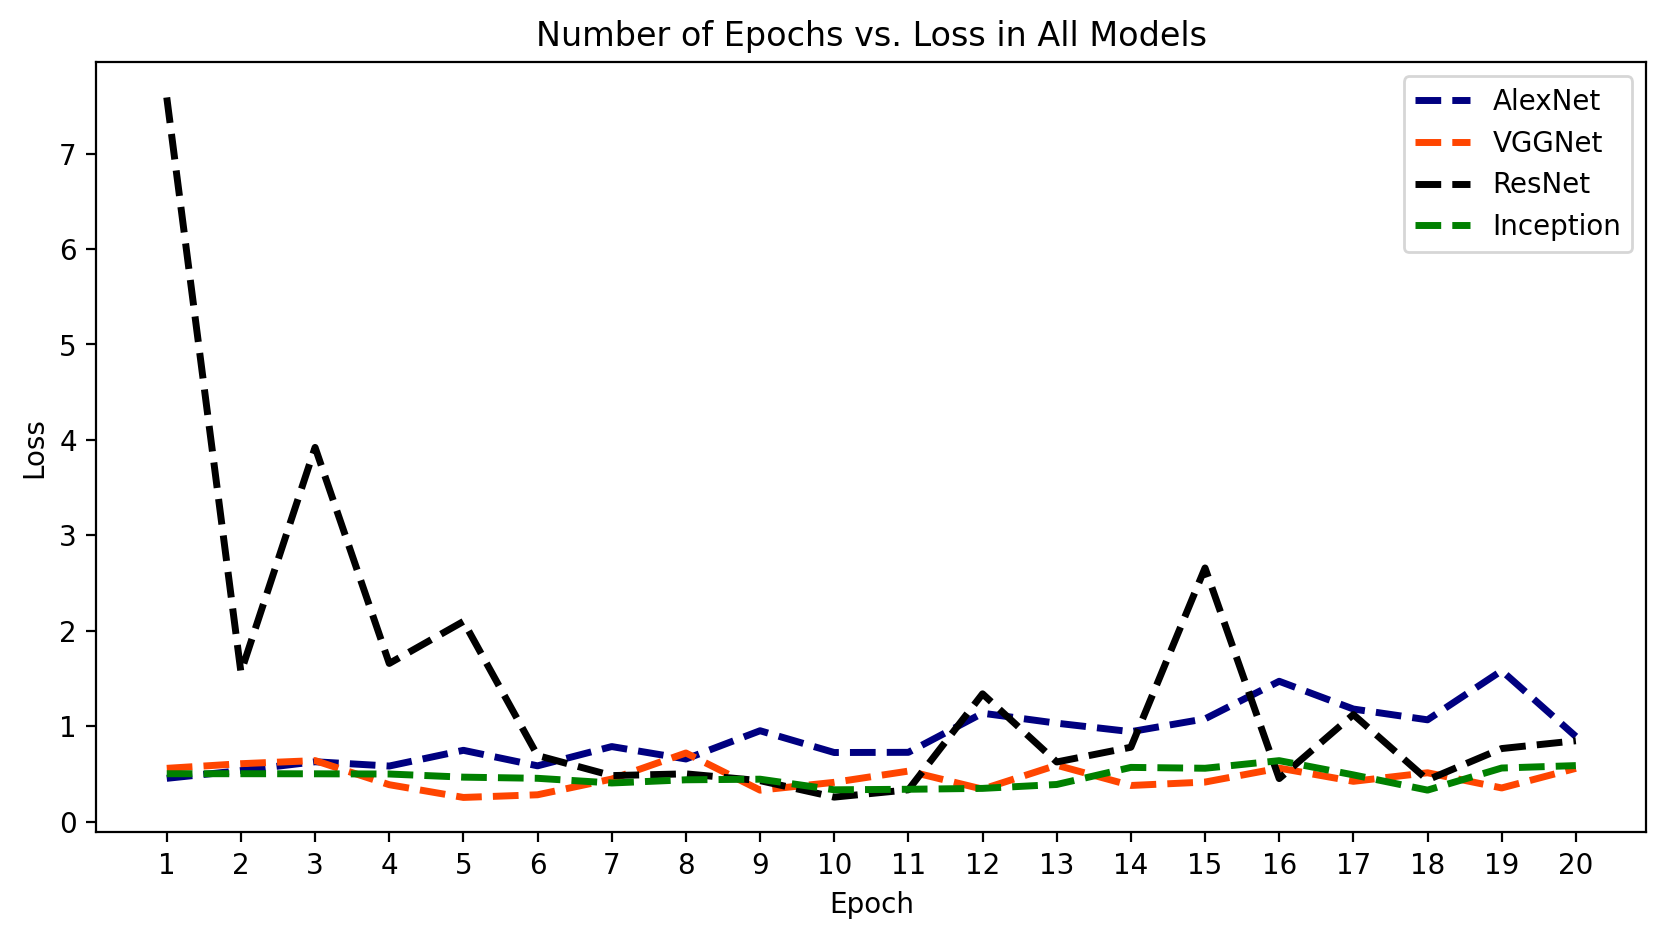

In [ ]:
plt.figure(figsize=(10,5), dpi=200)

plt.plot(epoch_count, val_loss_alex, '--', color='navy', linewidth=2.5, label='AlexNet')
plt.plot(epoch_count, val_loss_vgg, '--', color='orangered', linewidth=2.5, label='VGGNet')
plt.plot(epoch_count, val_loss_res, '--', color='black', linewidth=2.5, label='ResNet')
plt.plot(epoch_count, val_loss_inception, '--', color='green', linewidth=2.5, label='Inception')
plt.legend()
plt.title('Number of Epochs vs. Loss in All Models')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(np.arange(1, 21, 1))
plt.show()

**AlexNet**: It shows a rapid decline in loss, indicating fast learning at the beginning, and then it stabilizes with minor fluctuations. The loss stabilizes at a low value, which is good, but it does have some spikes that suggest potential instability in the training process.

**VGGNet**: The loss for VGGNet decreases quickly as well and remains low throughout the training process with minimal fluctuations, suggesting a stable learning process and good convergence.

**ResNet**: The loss for ResNet starts high, decreases rapidly, and has significant volatility throughout the training. This might indicate that while the model learns, it could benefit from regularization or other techniques to make the learning process smoother.

**Inception**: Inception's loss reduces steadily and remains low and stable after the initial epochs. It shows the lowest amount of volatility among the models, suggesting it's learning effectively without overfitting.

The **Inception model** is likely the most stable and effective at learning patterns in the data without overfitting, as indicated by its consistently low and stable loss values.
**VGGNet** also shows a stable decrease in loss, suggesting good learning, but not as effective as Inception since its loss values are slightly higher.
**AlexNet** and **ResNet** show more fluctuation in their loss, with ResNet, in particular, exhibiting the most variability. This might indicate a less stable training process or a model that is sensitive to the training data's variations.
Models that show less fluctuation in loss are generally considered to be learning more effectively, as they are not as affected by the variance in the training data from epoch to epoch.

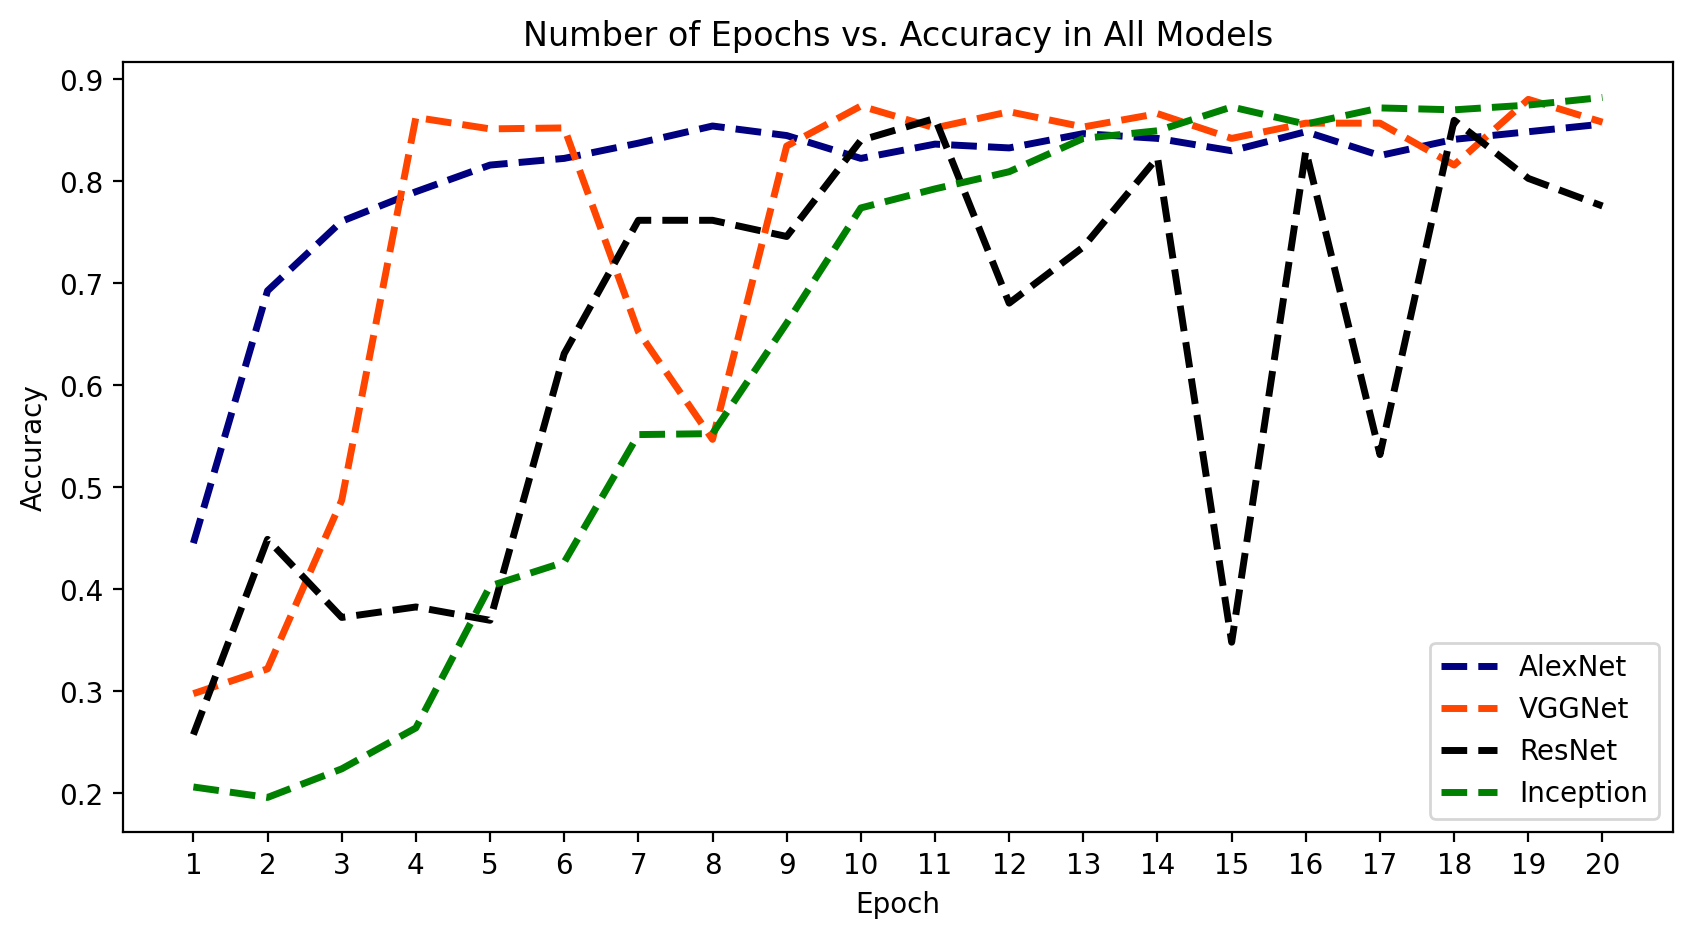

In [ ]:
plt.figure(figsize=(10,5), dpi=200)

plt.plot(epoch_count, val_acc_alex, '--', color='navy', linewidth=2.5, label='AlexNet')
plt.plot(epoch_count, val_acc_vgg, '--', color='orangered', linewidth=2.5, label='VGGNet')
plt.plot(epoch_count, val_acc_res, '--', color='black', linewidth=2.5, label='ResNet')
plt.plot(epoch_count, val_acc_inception, '--', color='green', linewidth=2.5, label='Inception')
plt.legend()
plt.title('Number of Epochs vs. Accuracy in All Models')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, 21, 1))
plt.show()

**AlexNet**: After a sharp increase, the accuracy levels off around 80%. The plot shows that the model reaches its peak performance relatively quickly but then plateaus, with little improvement over additional epochs.

**VGGNet**: The model shows a rapid improvement in accuracy, reaching just above 80% and staying relatively flat with some minor fluctuations, indicating that the model is learning but also hitting a performance ceiling.

**ResNet**: The accuracy increases sharply, with significant variability in performance throughout the epochs. This could suggest that the model may be overfitting to the training data or that its performance is sensitive to the initialization and the specific training batch used at each epoch.

**Inception**: This model has the steadiest and most consistent increase in accuracy, reaching close to 90%. The accuracy remains relatively stable after the initial training period, suggesting that the model is generalizing well.

The **Inception model** is the most consistent in terms of learning and generalization. It has the highest overall accuracy with less variance, making it potentially the most reliable model for new, unseen data.
**AlexNet** and **VGGNet** both show early rapid learning but then plateau, which could indicate that they have limited capacity to capture the complexities of the data compared to Inception.
**ResNet** shows a lot of variability, which might indicate a need for better hyperparameter tuning, a different learning rate schedule, or additional regularization to improve its performance consistency.
When considering stability and the ability to generalize, the ***Inception model*** stands out as the most suitable among the presented models. It achieves high accuracy and does so with the least variance across epochs.

**Streamlit app**

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 45.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.7 MB/s eta 0:00:00


In [ ]:
import streamlit as st

In [ ]:
# Loading the trained Inception model
def load_model():
    # Loading the JSON file that contains the model architecture
    with open("inception_model.json", "r") as json_file:
        loaded_model_json = json_file.read()

    # Loading the model architecture from the JSON file
    loaded_model = tf.keras.models.model_from_json(loaded_model_json)

    # Loading the model weights
    loaded_model.load_weights("inception_model_weights.h5")

    return loaded_model

In [ ]:
# Function to preprocess the image
def preprocess_image(image):
    # Resizing the image to match the input size of the model
    img = image.resize((224, 224))
    # Converting image to numpy array
    img_array = np.array(img)
    # Scaling the pixel values to the range [0, 1]
    img_array = img_array / 255.0
    # Adding an additional dimension to represent the batch size (required by the model)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

In [ ]:
# Loading the model
model = load_model()

In [ ]:
!pip install -q streamlit

In [ ]:
# Streamlit app
st.title("Driver Behavior Detection")

uploaded_file = st.file_uploader("Upload an image", type=["jpg", "png"])

if uploaded_file is not None:
    # Display the uploaded image
    image = Image.open(uploaded_file)
    st.image(image, caption='Uploaded Image', use_column_width=True)
    st.write("")
    st.write("Classifying...")

    # Make predictions
    predictions = predict(image, model)
    class_names = ['Other', 'Safe Driving', 'Talking Phone', 'Texting Phone', 'Turning']
    predicted_class = class_names[np.argmax(predictions)]
    confidence = np.max(predictions)

    st.write(f"Predicted Class: {predicted_class}")
    st.write(f"Confidence: {confidence:.2f}")

In [ ]:
!streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py &>/content/logs.txt &

In [ ]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 7.639s

3 packages are looking for funding
  run `npm fund` for details

found 1 moderate severity vulnerability
  run `npm audit fix` to fix them, or `npm audit` for details


In [ ]:
!streamlit run app.py &>/content/logs.txt &

In [ ]:
!npx localtunnel --port 8501

npx: installed 22 in 2.443s
your url is: https://true-tires-carry.loca.lt
/root/.npm/_npx/107059/lib/node_modules/localtunnel/bin/lt.js:81
    throw err;
    ^

Error: connection refused: localtunnel.me:38453 (check your firewall settings)
    at Socket.<anonymous> (/root/.npm/_npx/107059/lib/node_modules/localtunnel/lib/TunnelCluster.js:52:11)
    at Socket.emit (events.js:315:20)
    at emitErrorNT (internal/streams/destroy.js:106:8)
    at emitErrorCloseNT (internal/streams/destroy.js:74:3)
    at processTicksAndRejections (internal/process/task_queues.js:80:21)
